In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [3]:
df.head(25)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.50,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.00,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.20,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.00,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.00,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.00,23.7689,68.6447,Coal,Oil,NaN,...,2019.0,NaN,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.00,10.4547,77.0078,Hydro,NaN,NaN,...,2019.0,NaN,157.558250,152.195200,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.00,32.2258,77.2070,Hydro,NaN,NaN,...,2019.0,NaN,674.391100,721.335200,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.00,16.3300,75.8863,Hydro,NaN,NaN,...,2019.0,NaN,480.594950,144.434200,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.00,23.1642,81.6373,Coal,Oil,NaN,...,2019.0,NaN,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


# Problem Statement:-The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.



## Target Variable:- Primary Fuel,capacity_mw

In [4]:
df.shape

(907, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [6]:
df.groupby('primary_fuel')['country_long'].value_counts()

primary_fuel  country_long
Biomass       India            50
Coal          India           258
Gas           India            69
Hydro         India           251
Nuclear       India             9
Oil           India            20
Solar         India           127
Wind          India           123
Name: country_long, dtype: int64

In [7]:
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

## Observation:- Found some empty columns

In [8]:
## Removing Empty columns
df.drop(columns=['estimated_generation_gwh','generation_gwh_2019','generation_gwh_2013','wepp_id','other_fuel2','other_fuel3','url'],axis=1,inplace=True)

In [9]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,897,898,899,900,901,902,903,904,905,906
country,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,...,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND
country_long,India,India,India,India,India,India,India,India,India,India,...,India,India,India,India,India,India,India,India,India,India
name,ACME Solar Tower,ADITYA CEMENT WORKS,AES Saurashtra Windfarms,AGARTALA GT,AKALTARA TPP,AKRIMOTA LIG,ALIYAR,ALLAIN DUHANGAN,ALMATTI DAM,AMAR KANTAK,...,Wind power project by Riddhi Siddhi Gluco Biol...,Wind power project in Rajasthan,YAMUNANAGAR TPP,YASHWANTRAO MOHITE,YELHANKA (DG),YERMARUS TPP,Yelesandra Solar Power Plant,Yelisirur wind power project,ZAWAR MINES,iEnergy Theni Wind Farm
gppd_idnr,WRI1020239,WRI1019881,WRI1026669,IND0000001,IND0000002,IND0000003,IND0000004,IND0000005,IND0000006,IND0000007,...,WRI1026753,WRI1026769,IND0000511,WRI1019995,IND0000512,IND0000513,WRI1026222,WRI1026776,WRI1019901,WRI1026761
capacity_mw,2.5,98.0,39.2,135.0,1800.0,250.0,60.0,192.0,290.0,210.0,...,34.65,42.0,600.0,16.0,106.6,1600.0,3.0,25.5,80.0,16.5
latitude,28.1839,24.7663,21.9038,23.8712,21.9603,23.7689,10.4547,32.2258,16.33,23.1642,...,8.8709,27.1715,30.1081,17.1653,13.1156,16.2949,12.8932,15.2758,24.35,9.9344
longitude,73.2407,74.609,69.3732,91.3602,82.4091,68.6447,77.0078,77.207,75.8863,81.6373,...,77.4466,70.6877,77.3257,74.2456,77.5838,77.3568,78.1654,75.5811,73.7477,77.4768
primary_fuel,Solar,Coal,Wind,Gas,Coal,Coal,Hydro,Hydro,Hydro,Coal,...,Wind,Wind,Coal,Biomass,Oil,Coal,Solar,Wind,Coal,Wind
other_fuel1,NaN,NaN,NaN,NaN,Oil,Oil,NaN,NaN,NaN,Oil,...,NaN,NaN,Oil,NaN,NaN,Oil,NaN,NaN,NaN,NaN
commissioning_year,2011.0,NaN,NaN,2004.0,2015.0,2005.0,1970.0,2010.0,2004.0,2008.0,...,NaN,NaN,2007.0,NaN,1993.0,2016.0,NaN,NaN,NaN,NaN


In [12]:
df.isna().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [13]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [14]:
df.nunique()

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  836
longitude                 827
primary_fuel                8
other_fuel1                 3
commissioning_year         73
owner                     280
source                    191
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2014       371
generation_gwh_2015       396
generation_gwh_2016       403
generation_gwh_2017       408
generation_gwh_2018       410
generation_data_source      1
dtype: int64

In [15]:
df['generation_data_source'].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

In [16]:
df['year_of_capacity_data'].unique()

array([  nan, 2019.])

# Observation:- Year and generation shows irrelevant to proceed for model,so dropping these two column.


In [17]:
df.drop(columns=['generation_data_source','year_of_capacity_data'],axis=1,inplace=True)

In [18]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN


In [19]:
df.drop(columns=['country','country_long','gppd_idnr'],axis=1,inplace=True)

In [20]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN


In [21]:
# Lets impute missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [22]:
df1=df[['capacity_mw','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]

In [23]:
imputed=IterativeImputer(random_state=42)
imp=imputed.fit_transform(df1)

In [24]:
df2=pd.DataFrame(imp,columns=df1.columns)

In [25]:
df['generation_gwh_2014']=df2['generation_gwh_2014']
df['generation_gwh_2015']=df2['generation_gwh_2015']
df['generation_gwh_2016']=df2['generation_gwh_2016']
df['generation_gwh_2017']=df2['generation_gwh_2017']
df['generation_gwh_2018']=df2['generation_gwh_2018']

In [26]:
df.isna().sum()

name                     0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
owner                  565
source                   0
geolocation_source      19
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

In [27]:
df['latitude']=df['latitude'].fillna(df['latitude'].mean())
df['longitude']=df['longitude'].fillna(df['longitude'].mean())
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].median())

In [28]:
df.isnull().sum()

name                     0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1            709
commissioning_year       0
owner                  565
source                   0
geolocation_source       0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

In [29]:
df.drop(columns=['other_fuel1','owner'],axis=1,inplace=True)

In [30]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,1288.670952,1342.448818,1186.373783,1064.675602,925.269267
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,2001.0,Ultratech Cement ltd,WRI,1431.720928,1492.108378,1372.923956,1285.774710,1182.793896
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,2001.0,CDM,WRI,1343.644084,1399.961968,1258.063745,1149.642484,1024.234229
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,WRI,446.714974,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,2001.0,Karnataka Power Corporation Limited,Industry About,1289.419905,1343.232375,1187.350486,1065.833189,926.617563
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,2001.0,CDM,WRI,1323.122778,1378.492481,1231.302097,1117.924602,987.290905
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,2001.0,Hindustan Zinc ltd,WRI,1404.758629,1463.900294,1337.762667,1244.101580,1134.255222


# EDA

In [31]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1998.728776,1773.578548,1849.761436,1818.737371,1814.152392,1798.220471
std,590.085456,6.079148,4.812291,13.158621,2748.972481,2928.820019,2951.021323,3014.506369,3140.272186
min,0.000000,8.168900,68.644700,1927.000000,-627.793950,-743.690999,0.000000,-77.227020,-171.843616
25%,16.725000,17.072000,74.388900,1998.000000,665.933600,664.038125,703.619225,804.900275,810.733240
50%,59.200000,21.281800,76.979200,2001.000000,1301.702730,1357.336418,1210.791345,1093.615276,961.673272
75%,385.250000,25.176450,79.206100,2003.000000,1360.420626,1419.629272,1316.665894,1255.990270,1185.086000
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [32]:
df.columns

Index(['name', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

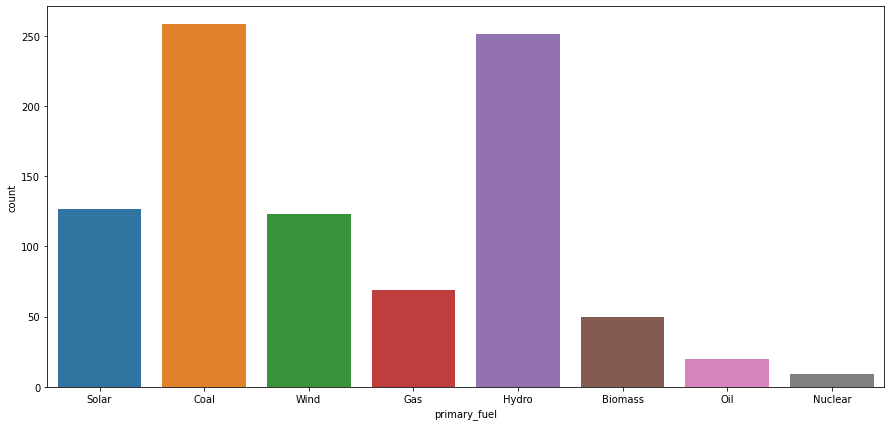

In [33]:
plt.figure(figsize=(15,7))
sns.countplot(x='primary_fuel',data=df)

## Observation:- Coal and hydropower plant is more as compared to other fuel

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

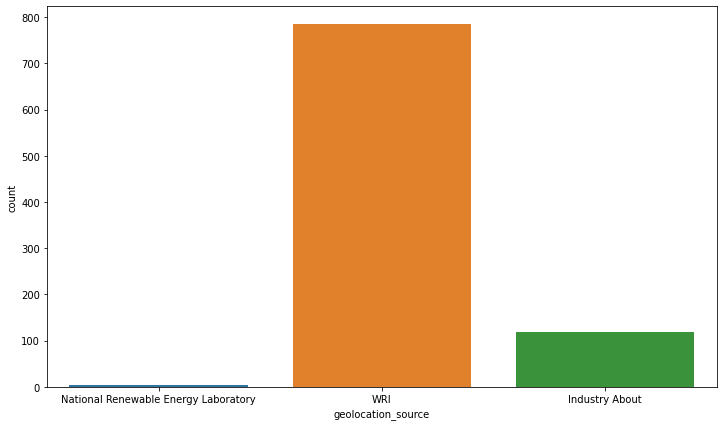

In [34]:
plt.figure(figsize=(12,7))
sns.countplot(x='geolocation_source',data=df)

<Figure size 1080x576 with 0 Axes>

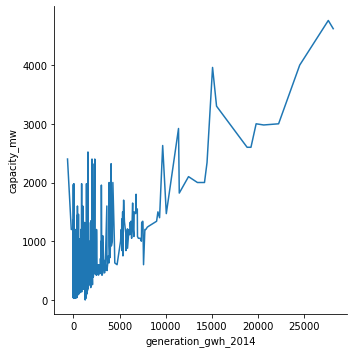

In [35]:
plt.figure(figsize=(15,8))
sns.relplot(x='generation_gwh_2014',y='capacity_mw',kind='line',data=df)

<Figure size 1080x576 with 0 Axes>

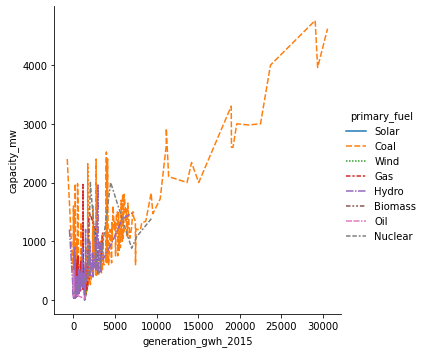

In [36]:
plt.figure(figsize=(15,8))
sns.relplot(x='generation_gwh_2015',y='capacity_mw',kind='line',hue='primary_fuel',style='primary_fuel',data=df)

<Figure size 1080x576 with 0 Axes>

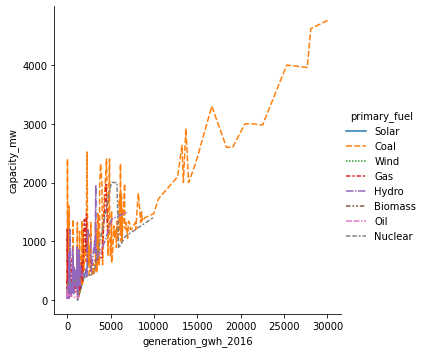

In [37]:
plt.figure(figsize=(15,8))
sns.relplot(x='generation_gwh_2016',y='capacity_mw',kind='line',hue='primary_fuel',style='primary_fuel',data=df)

<Figure size 1080x576 with 0 Axes>

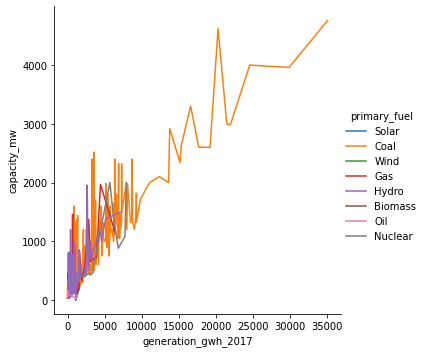

In [38]:
plt.figure(figsize=(15,8))
sns.relplot(x='generation_gwh_2017',y='capacity_mw',kind='line',hue='primary_fuel',data=df)

<Figure size 1080x576 with 0 Axes>

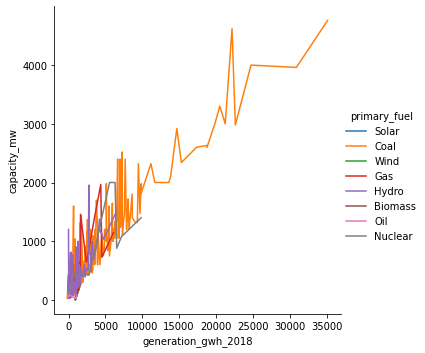

In [39]:
plt.figure(figsize=(15,8))
sns.relplot(x='generation_gwh_2018',y='capacity_mw',kind='line',hue='primary_fuel',data=df)

# Observation:- In all the plot the electricity generated by coal powerplant in all years is higher than other powerplant

<AxesSubplot:xlabel='primary_fuel', ylabel='latitude'>

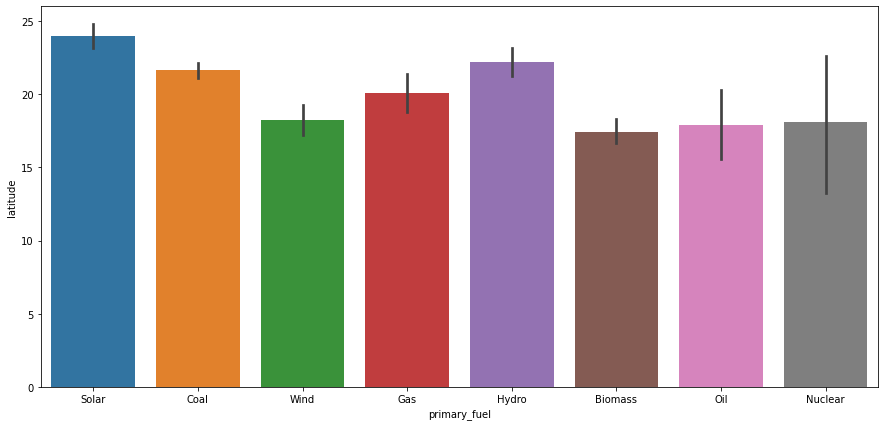

In [40]:
plt.figure(figsize=(15,7))
sns.barplot(x='primary_fuel',y='latitude',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='longitude'>

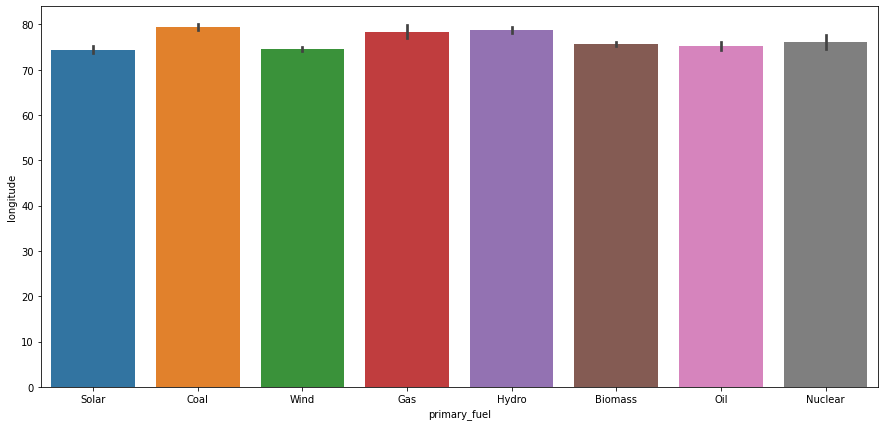

In [41]:
plt.figure(figsize=(15,7))
sns.barplot(x='primary_fuel',y='longitude',data=df)

# Observation:- Primary fuel coal,hydro and solar has high longitude and latitude

<AxesSubplot:xlabel='primary_fuel', ylabel='latitude'>

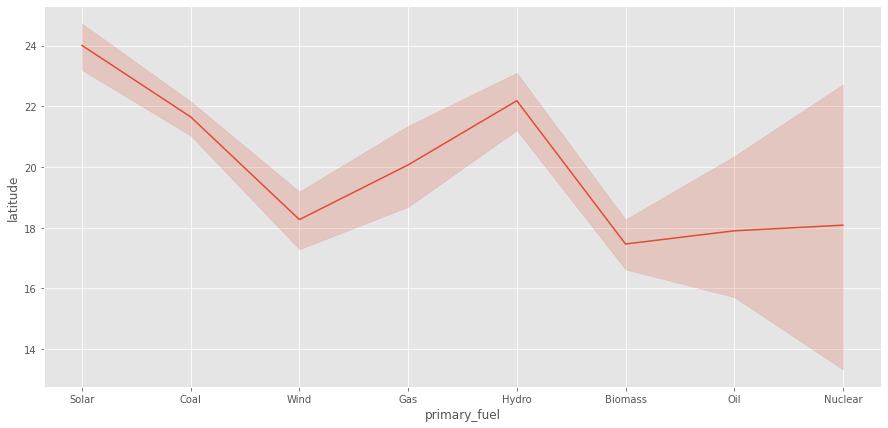

In [42]:
plt.style.use('ggplot')
plt.figure(figsize=(15,7))
sns.lineplot(x='primary_fuel',y='latitude',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='longitude'>

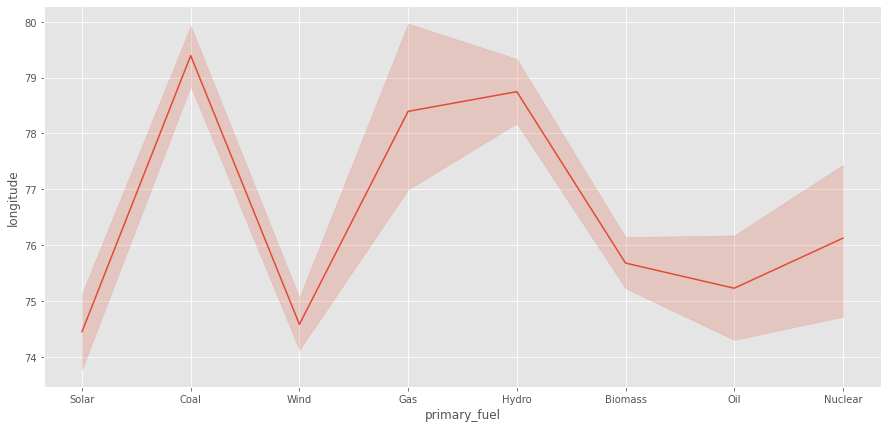

In [43]:
plt.figure(figsize=(15,7))
sns.lineplot(x='primary_fuel',y='longitude',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

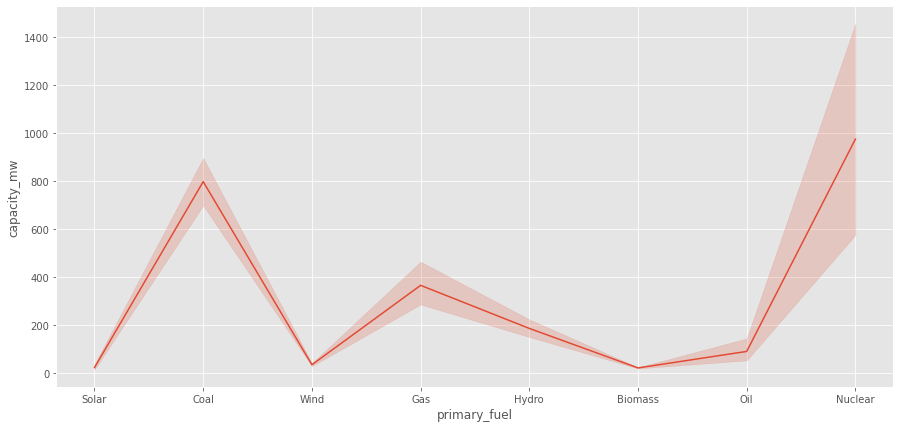

In [44]:
plt.figure(figsize=(15,7))
sns.lineplot(x='primary_fuel',y='capacity_mw',data=df)

# Observation:- The study shows that the nuclear and coal producing high electrical energy.

<AxesSubplot:xlabel='primary_fuel', ylabel='commissioning_year'>

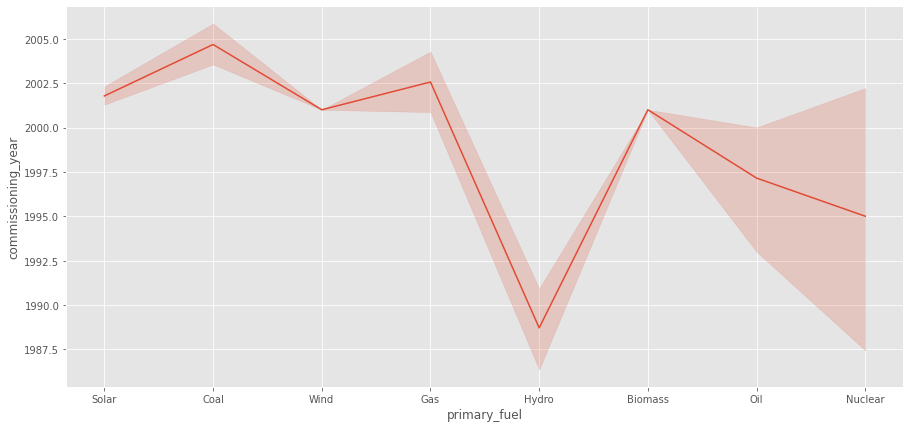

In [45]:
plt.figure(figsize=(15,7))
sns.lineplot(x='primary_fuel',y='commissioning_year',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='geolocation_source'>

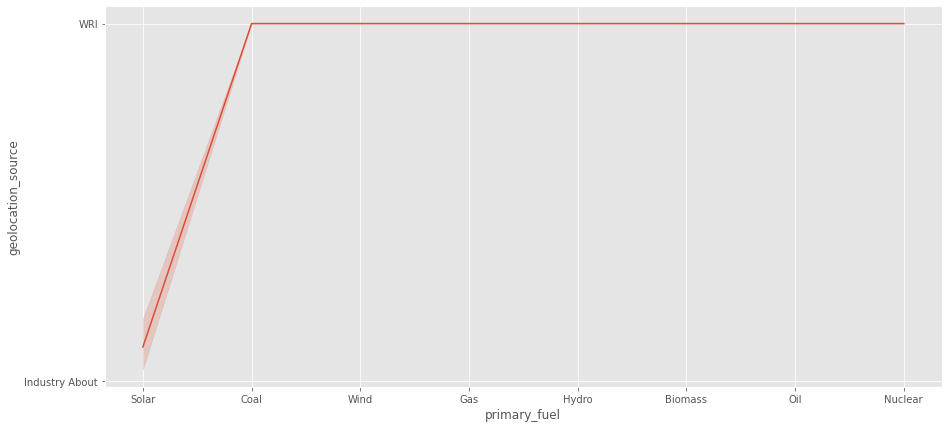

In [46]:
plt.figure(figsize=(15,7))
sns.lineplot(x='primary_fuel',y='geolocation_source',data=df)

# Pair Plot

<Figure size 1080x1080 with 0 Axes>

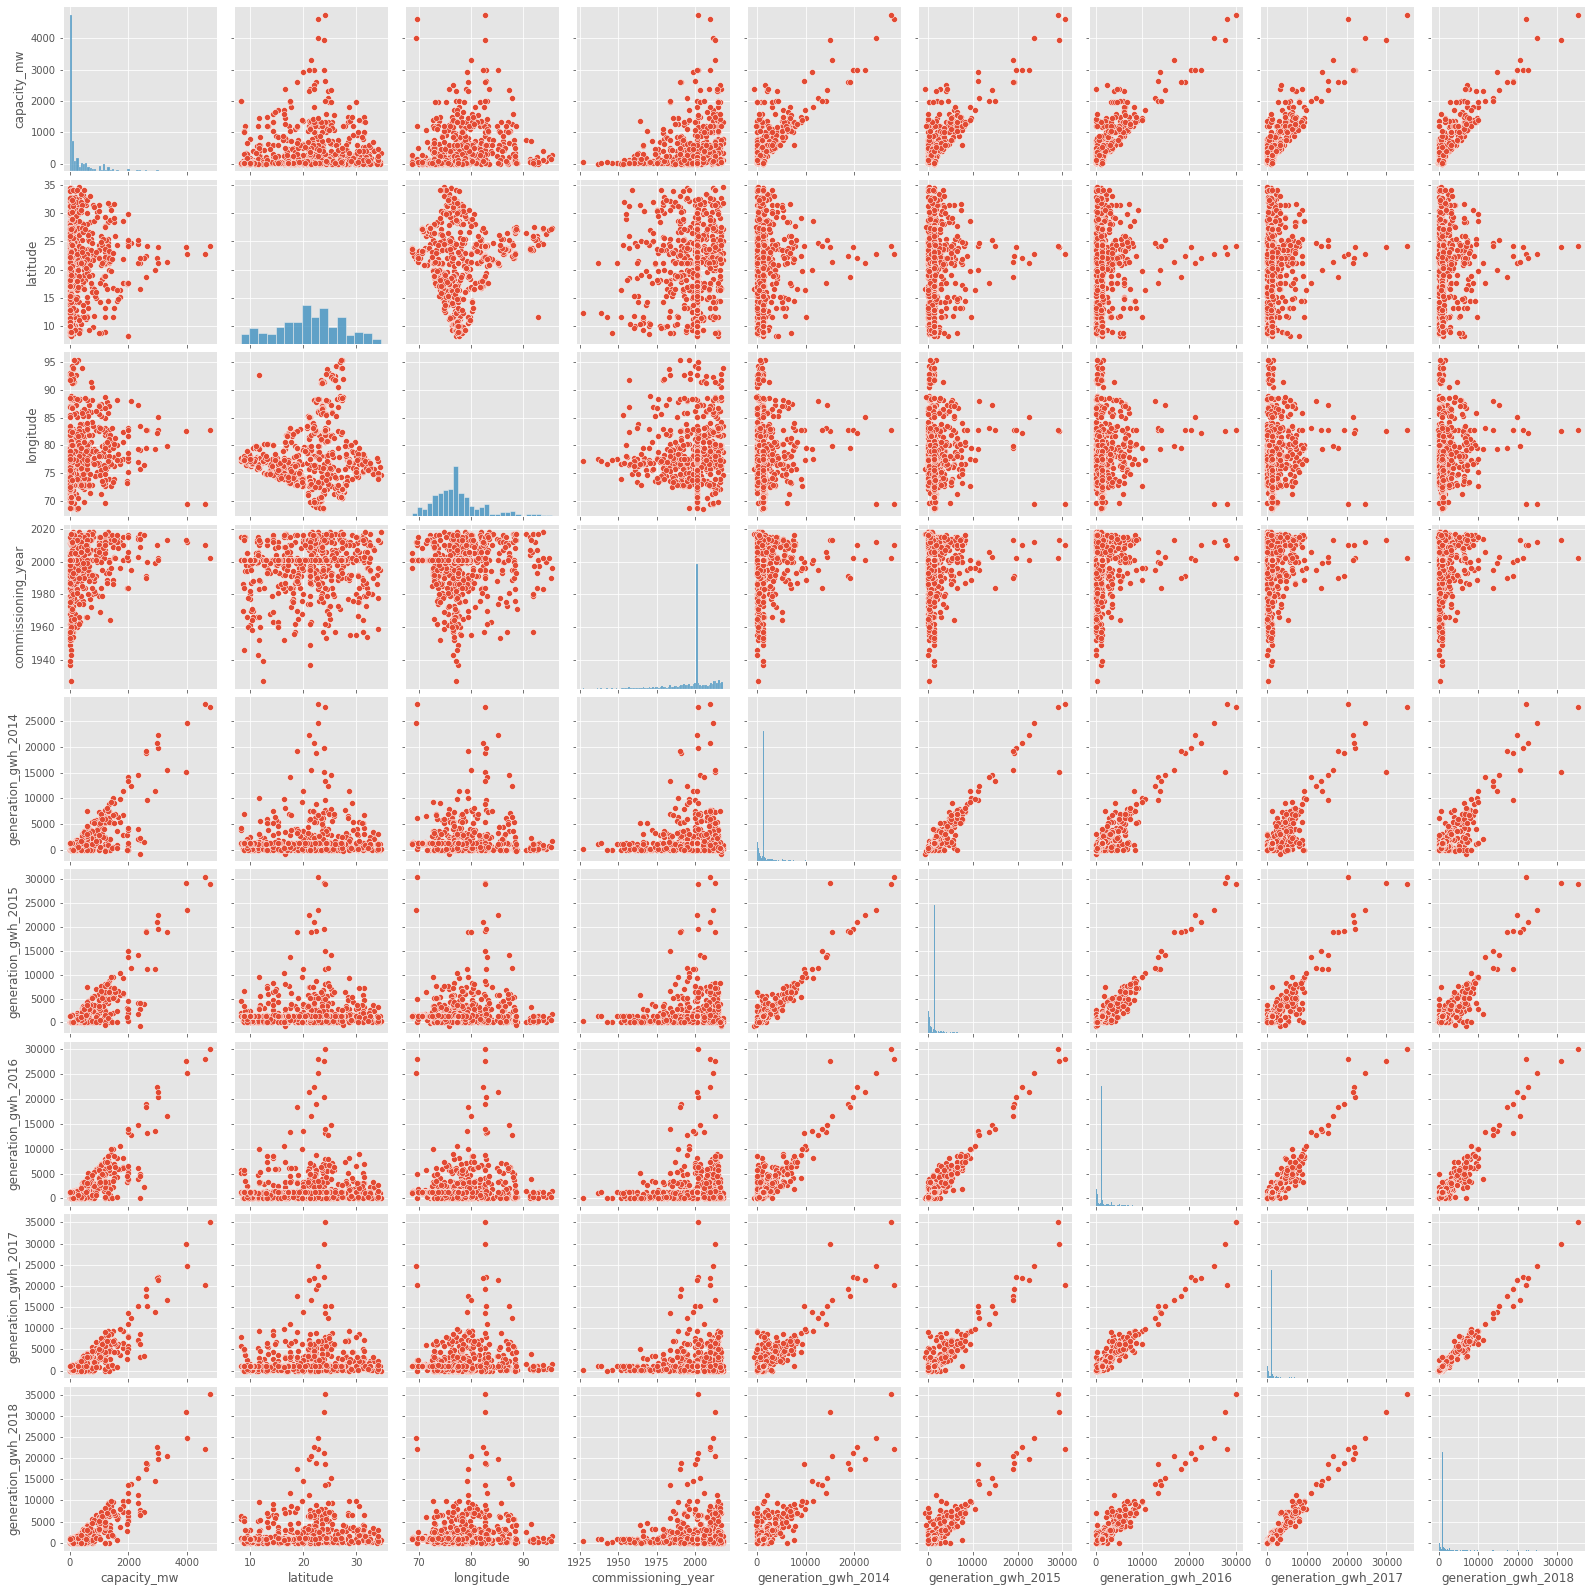

In [49]:
plt.figure(figsize=(15,15))
sns.pairplot(df)


# Observation:- Plot show capacity growth is linearly dependent on generation_gwh 

In [50]:
## Importing label encoder
from sklearn.preprocessing import LabelEncoder

In [51]:
lm=LabelEncoder()

In [52]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
902    False
903    False
904    False
905    False
906    False
Length: 907, dtype: bool

In [53]:
categorial_variable=['primary_fuel','source','geolocation_source']
df[categorial_variable]=df[categorial_variable].apply(lm.fit_transform)

In [54]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,6,2011.0,109,1,1288.670952,1342.448818,1186.373783,1064.675602,925.269267
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,1,2001.0,174,2,1431.720928,1492.108378,1372.923956,1285.774710,1182.793896
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,7,2001.0,21,2,1343.644084,1399.961968,1258.063745,1149.642484,1024.234229
3,AGARTALA GT,135.0,23.8712,91.3602,2,2004.0,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,1,2015.0,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,1,2016.0,22,2,446.714974,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,6,2001.0,77,0,1289.419905,1343.232375,1187.350486,1065.833189,926.617563
904,Yelisirur wind power project,25.5,15.2758,75.5811,7,2001.0,21,2,1323.122778,1378.492481,1231.302097,1117.924602,987.290905
905,ZAWAR MINES,80.0,24.3500,73.7477,1,2001.0,59,2,1404.758629,1463.900294,1337.762667,1244.101580,1134.255222


In [55]:
df.drop('name',axis=1,inplace=True)

In [56]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,109,1,1288.670952,1342.448818,1186.373783,1064.675602,925.269267
1,98.0,24.7663,74.6090,1,2001.0,174,2,1431.720928,1492.108378,1372.923956,1285.774710,1182.793896
2,39.2,21.9038,69.3732,7,2001.0,21,2,1343.644084,1399.961968,1258.063745,1149.642484,1024.234229
3,135.0,23.8712,91.3602,2,2004.0,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.0,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,22,2,446.714974,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,2001.0,77,0,1289.419905,1343.232375,1187.350486,1065.833189,926.617563
904,25.5,15.2758,75.5811,7,2001.0,21,2,1323.122778,1378.492481,1231.302097,1117.924602,987.290905
905,80.0,24.3500,73.7477,1,2001.0,59,2,1404.758629,1463.900294,1337.762667,1244.101580,1134.255222


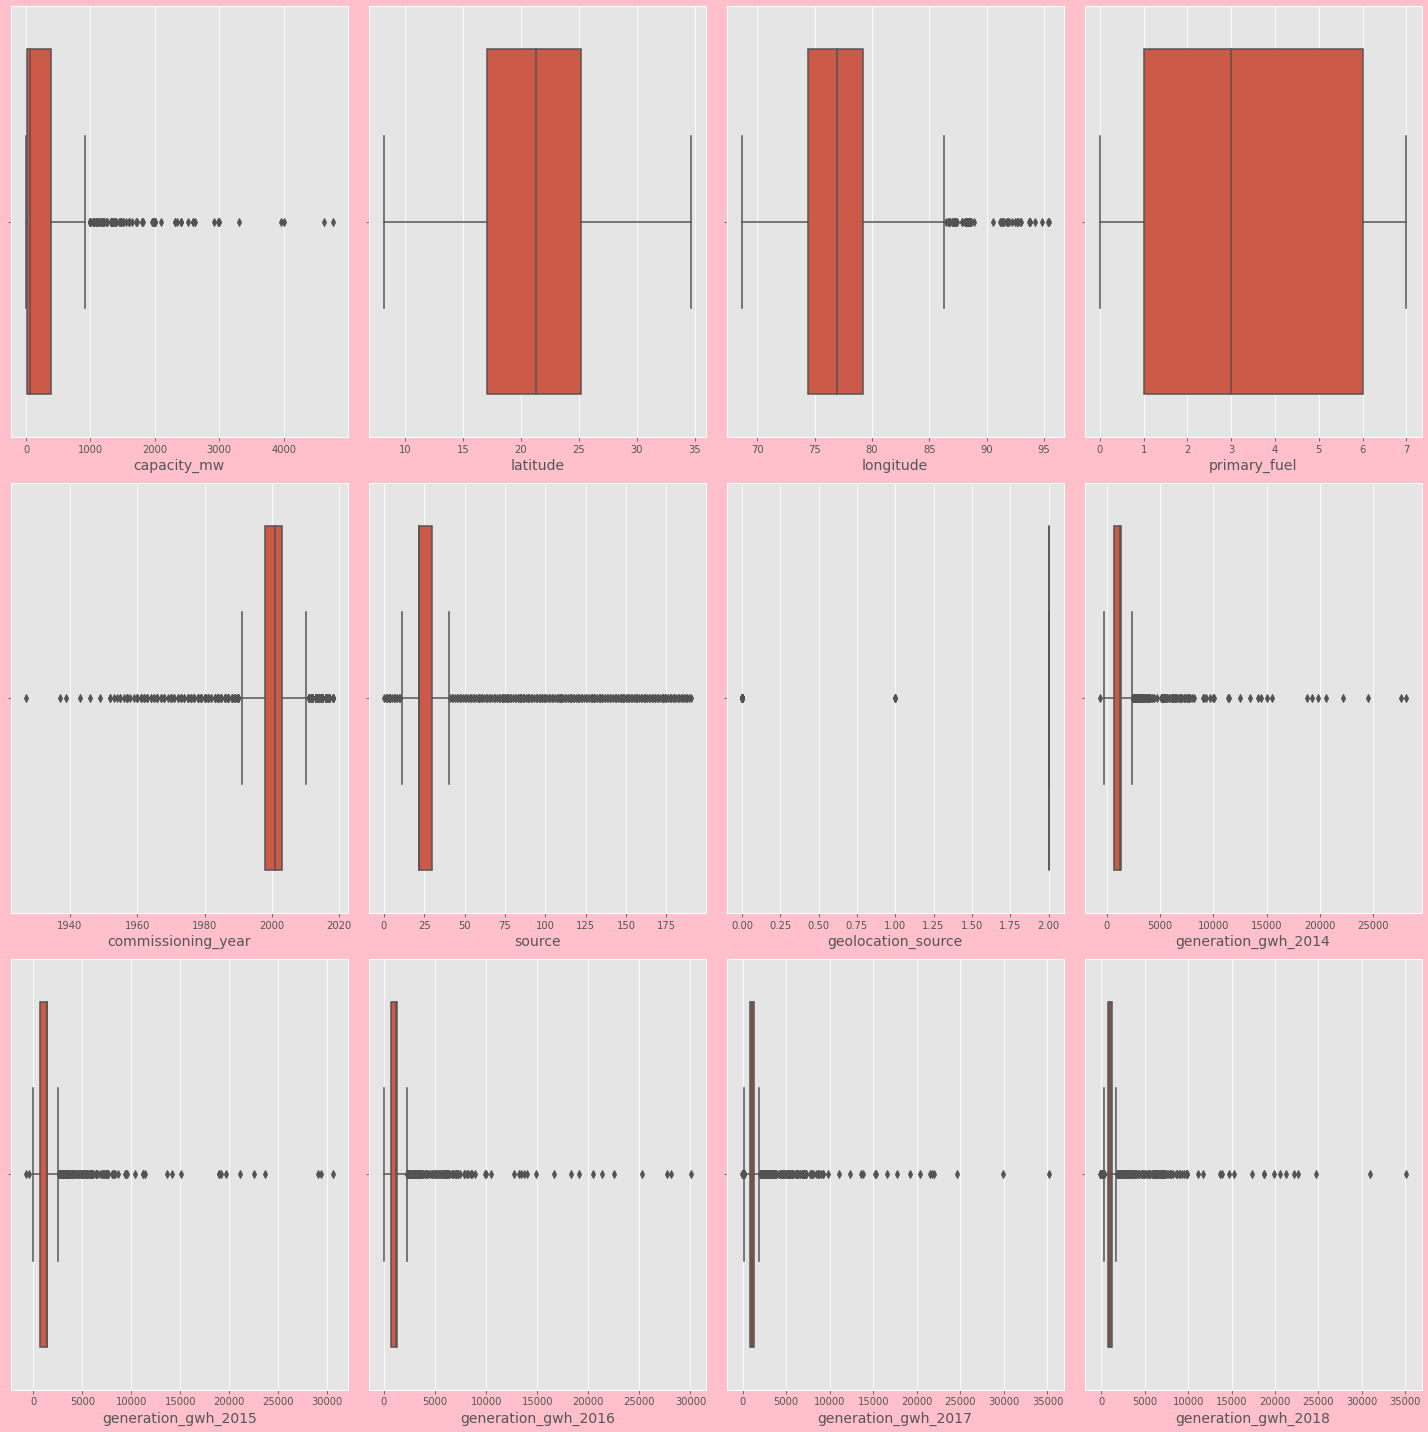

In [58]:
plt.figure(figsize=(20,20),facecolor='pink')
plotnumber=1

for column in df:
    if plotnumber <= 12:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=14)
    plotnumber=plotnumber+1
    
plt.tight_layout()

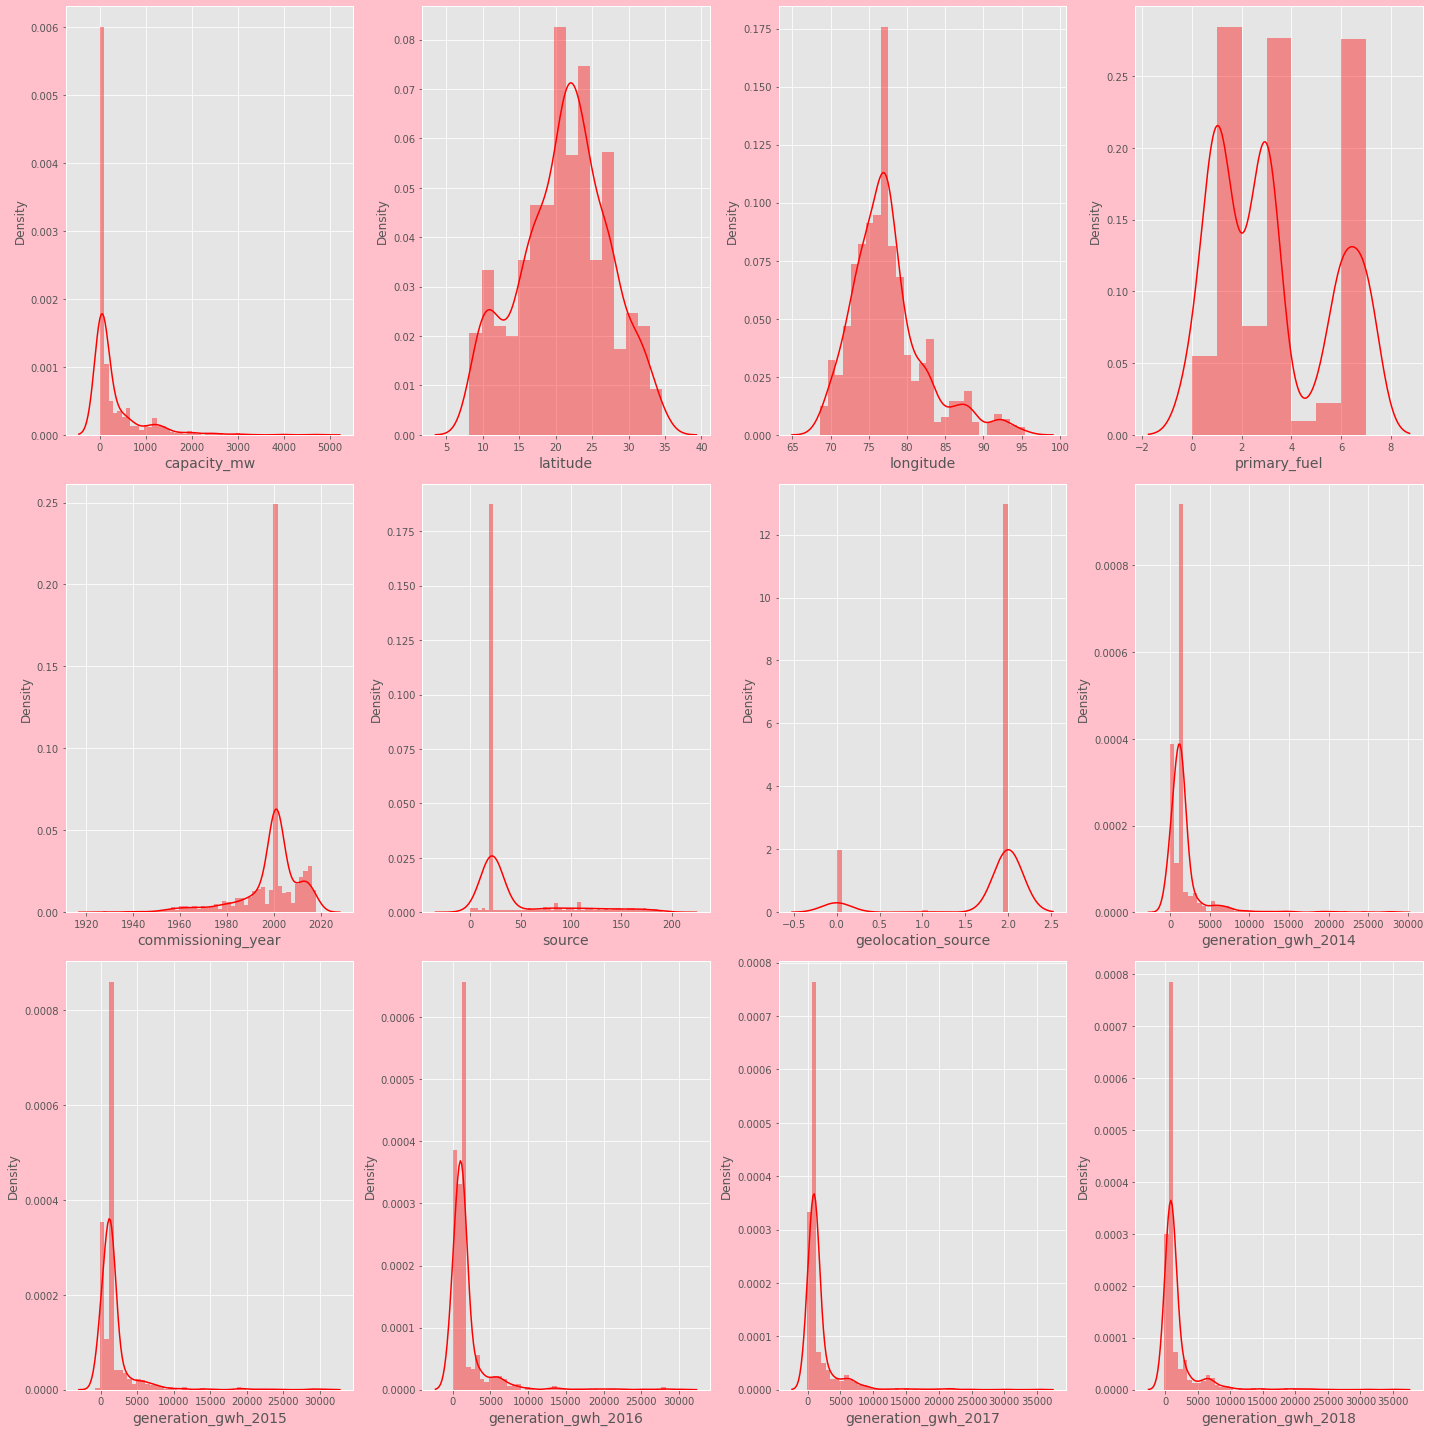

In [62]:
plt.figure(figsize=(20,20),facecolor='pink')
plotnumber=1

for column in df:
    if plotnumber <= 12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[column],color='r')
        plt.xlabel(column,fontsize=14)
    plotnumber=plotnumber+1
    
plt.tight_layout()

# Observation:- 1. Outlier found 2. skewness in the data

In [63]:
## Removing Outlier through zscore
from scipy.stats import zscore
df=df[np.abs(zscore(df)<3).all(axis=1)]

In [64]:
df.shape

(852, 12)

In [66]:
data_loss=907-852
print((data_loss/907)*100)

6.063947078280044


# Since 6 % data_loss we concluded so we can proceed

In [67]:
df.skew()

capacity_mw            1.997844
latitude              -0.109981
longitude              0.925439
primary_fuel           0.423184
commissioning_year    -1.718919
source                 1.818830
geolocation_source    -2.140211
generation_gwh_2014    2.661899
generation_gwh_2015    2.470095
generation_gwh_2016    2.543754
generation_gwh_2017    2.489654
generation_gwh_2018    2.570453
dtype: float64

In [68]:
# Separting Target variable and features
X=df.drop('primary_fuel',axis=1)
y=df.primary_fuel

In [69]:
## Importing powertransformer
from sklearn.preprocessing import PowerTransformer

In [70]:
pt=PowerTransformer()

In [71]:
x=pd.DataFrame(pt.fit_transform(X),columns=X.columns)

In [72]:
x

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.678080,1.153338,-0.941274,1.119749,1.634724,-2.322383,0.005301,-0.016965,0.101110,-0.074703,-0.180197
1,0.229427,0.590793,-0.523612,0.067138,2.109191,0.398946,0.112285,0.088210,0.240883,0.092945,0.013004
2,-0.269219,0.122919,-2.370549,0.067138,-0.462731,0.398946,0.046838,0.023773,0.156404,-0.008597,-0.103890
3,0.402434,0.444148,2.432670,0.358029,-0.393796,0.398946,-0.561142,-0.391123,-0.157697,-0.424922,-0.431431
4,1.759759,0.132122,1.239137,1.612920,-0.393796,0.398946,1.146936,2.602564,2.203378,2.140869,2.922697
...,...,...,...,...,...,...,...,...,...,...,...
847,1.699814,-0.783616,0.204297,1.743400,-0.393796,0.398946,-0.733574,-1.270353,-1.053556,-0.239672,-0.377792
848,-1.598754,-1.325424,0.393871,0.067138,1.249376,-2.512703,0.005871,-0.016407,0.101878,-0.073787,-0.179138
849,-0.503638,-0.946644,-0.250257,0.067138,-0.462731,0.398946,0.031397,0.008614,0.136008,-0.033012,-0.132048
850,0.119377,0.522553,-0.781799,0.067138,0.934129,0.398946,0.092389,0.068589,0.215526,0.062392,-0.022139


In [73]:
x.skew()

capacity_mw            0.014804
latitude              -0.073608
longitude             -0.002018
commissioning_year    -0.547000
source                -0.192768
geolocation_source    -2.111830
generation_gwh_2014    0.755796
generation_gwh_2015    0.807803
generation_gwh_2016    0.026304
generation_gwh_2017    0.400120
generation_gwh_2018    0.573718
dtype: float64

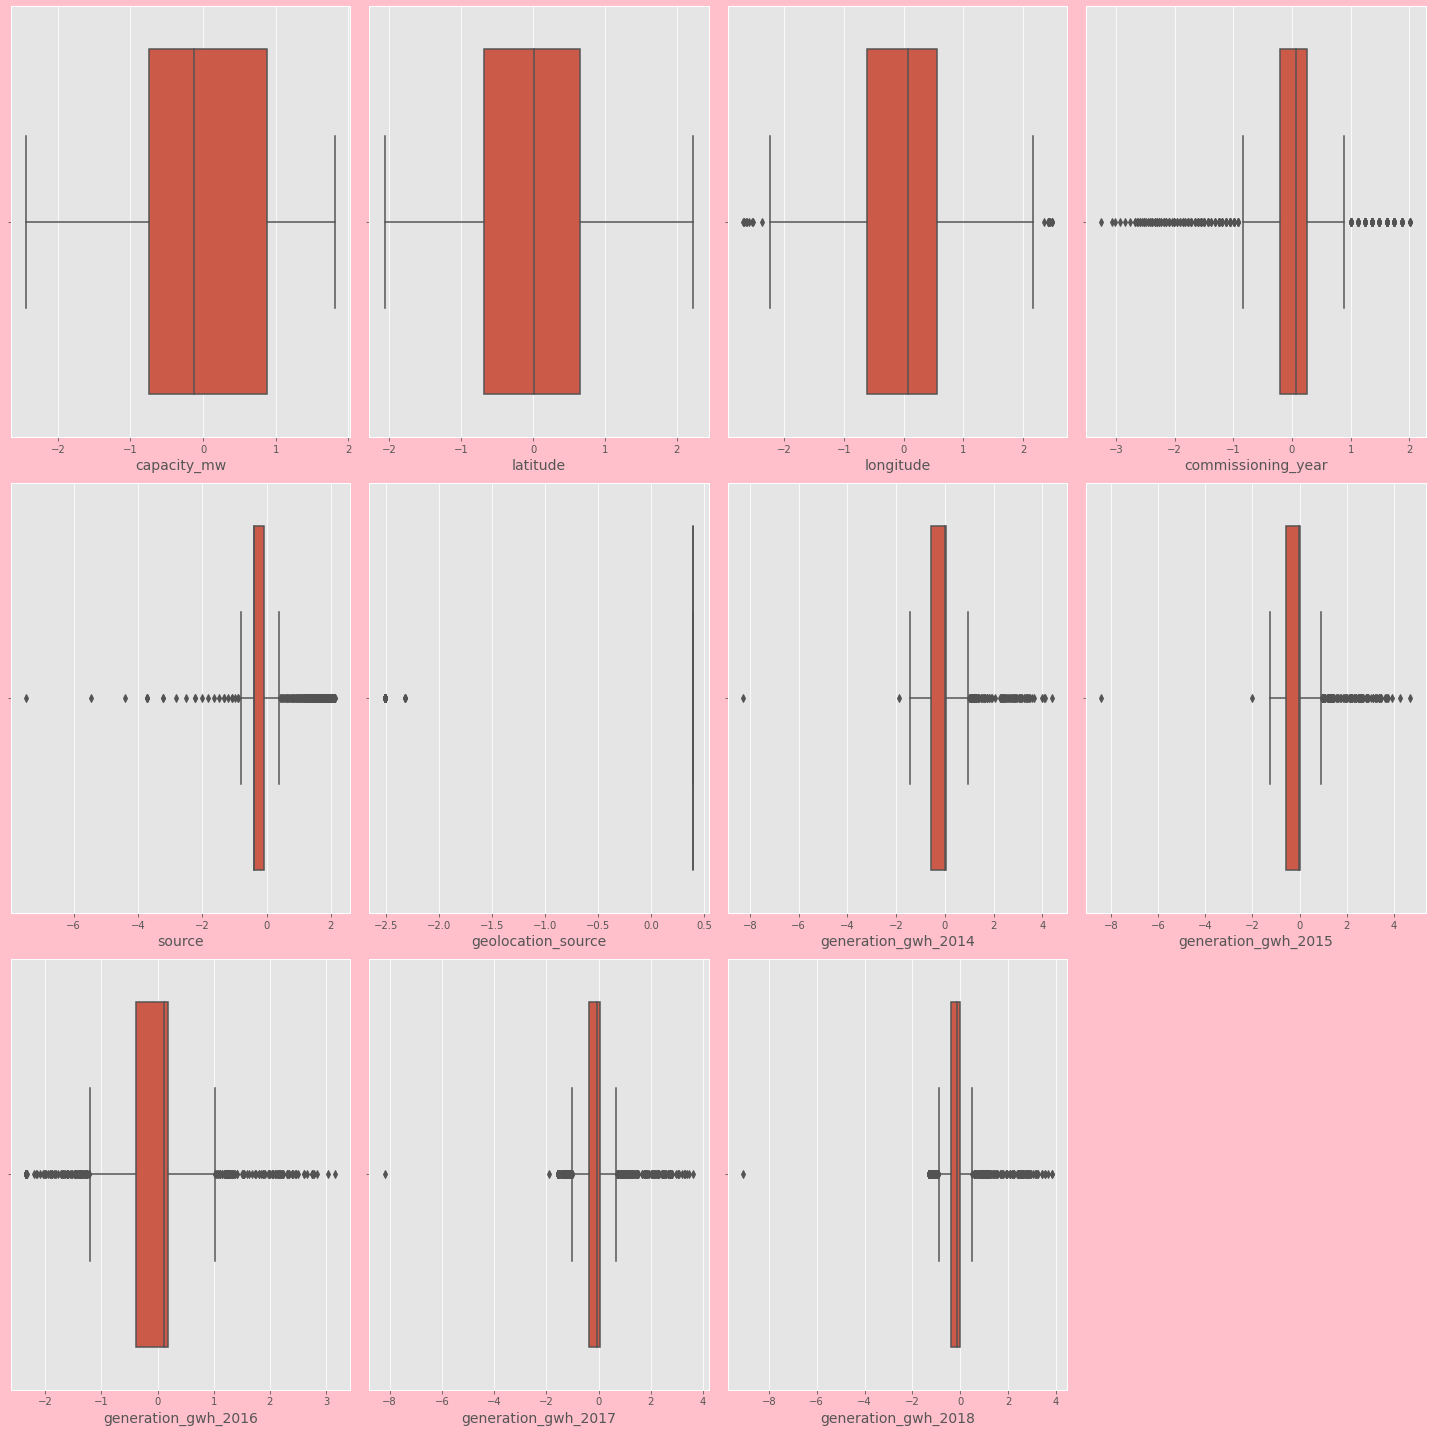

In [74]:
plt.figure(figsize=(20,20),facecolor='pink')
plotnumber=1

for column in x:
    if plotnumber <= 12:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(x[column])
        plt.xlabel(column,fontsize=14)
    plotnumber=plotnumber+1
    
plt.tight_layout()

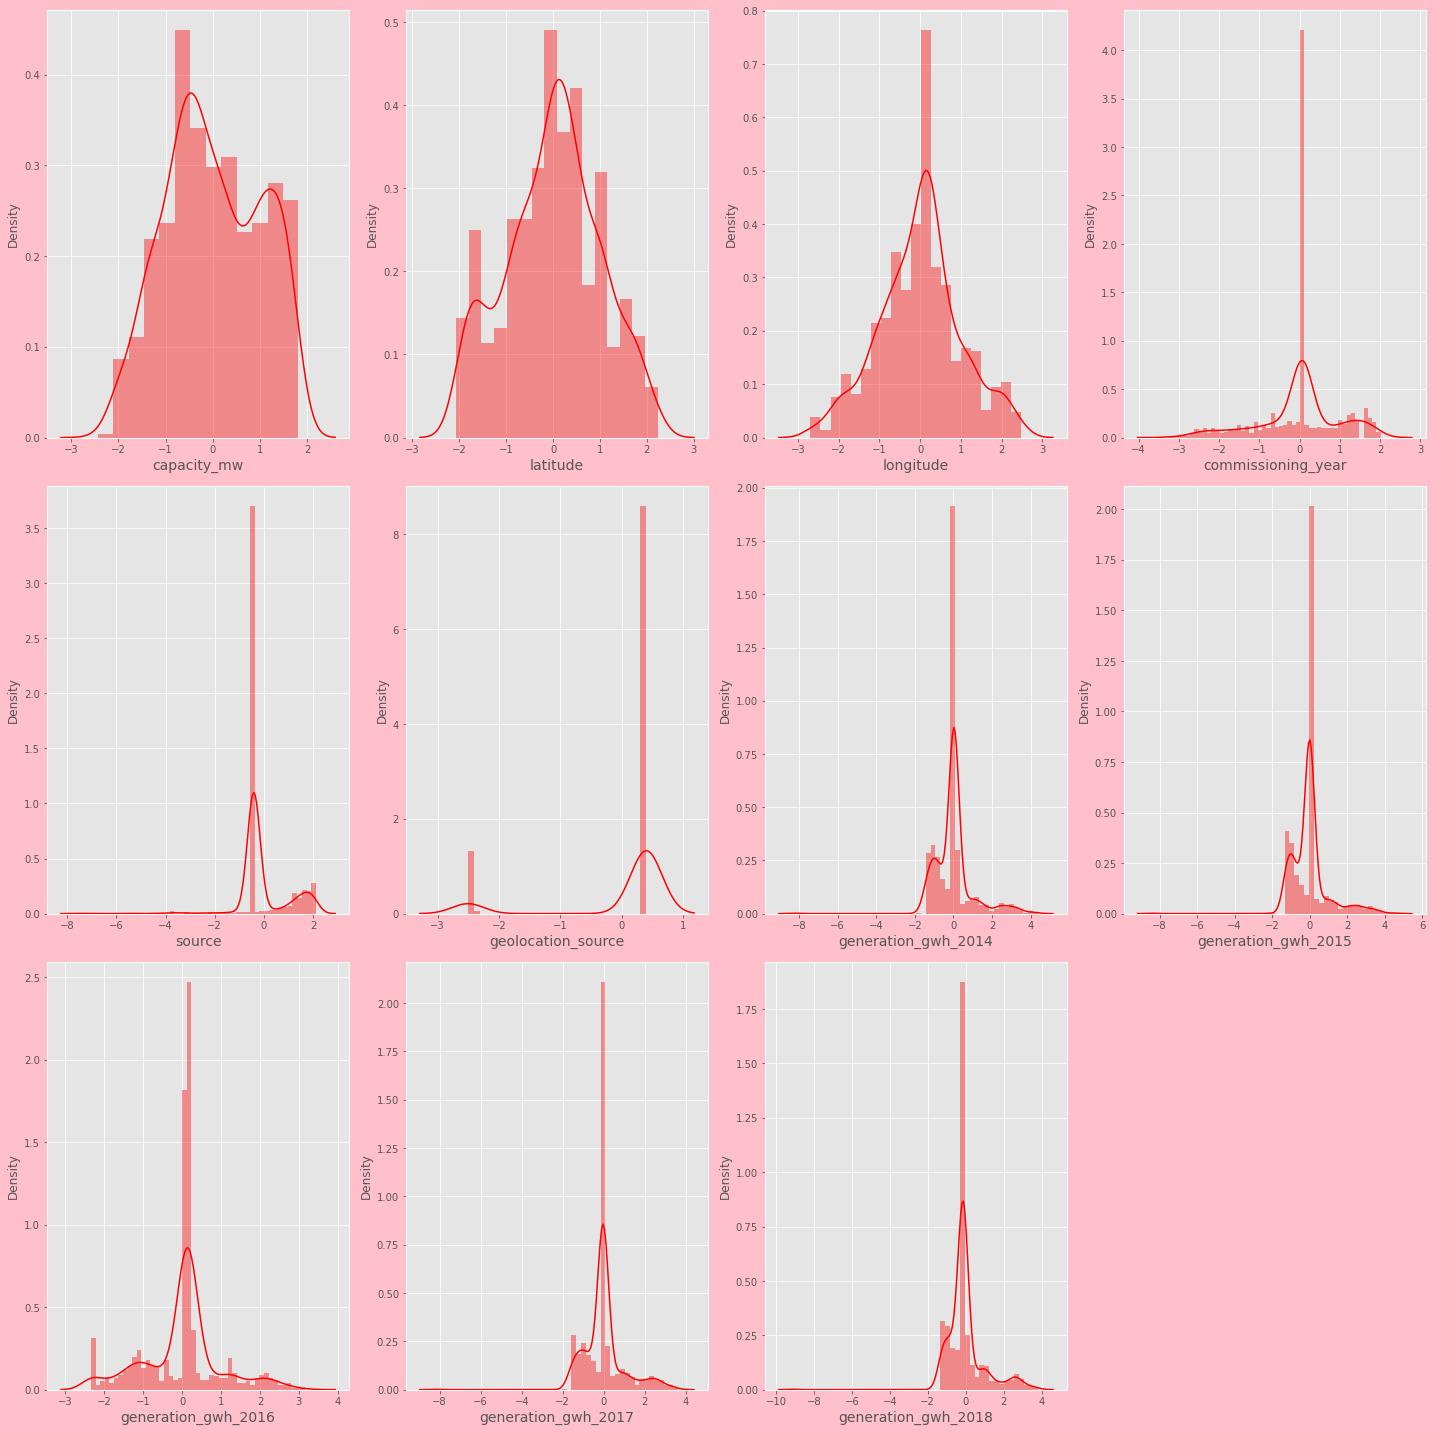

In [75]:
plt.figure(figsize=(20,20),facecolor='pink')
plotnumber=1

for column in x:
    if plotnumber <= 12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(x[column],color='r')
        plt.xlabel(column,fontsize=14)
    plotnumber=plotnumber+1
    
plt.tight_layout()

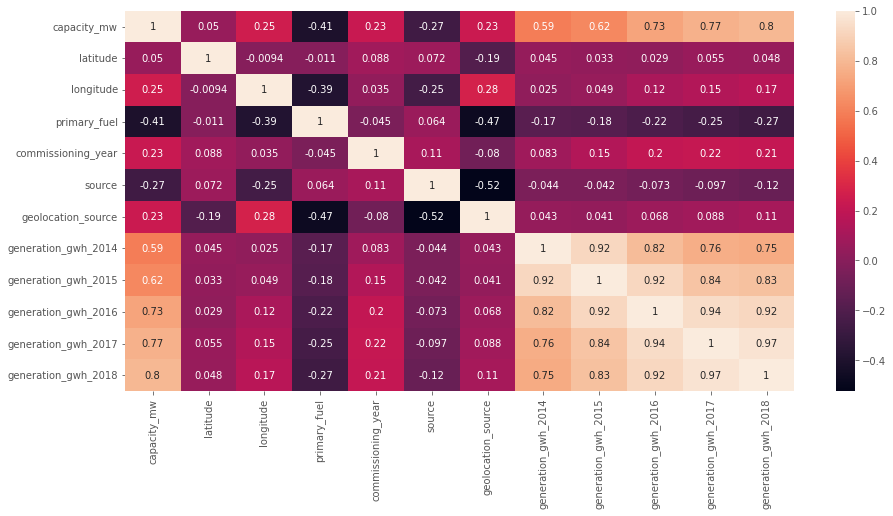

In [76]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':10})
plt.show()

In [79]:
# lets operate the multicolinearity problem through Variance inflation factor
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [81]:
x_scaled.shape[1]

11

In [82]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['feature']=x.columns

In [83]:
vif

,vif,feature
0,2.059620,capacity_mw
1,1.085120,latitude
2,1.198587,longitude
3,1.172676,commissioning_year
4,1.246946,source
5,1.599262,geolocation_source
6,6.916983,generation_gwh_2014
7,9.572692,generation_gwh_2015
8,9.564484,generation_gwh_2016
9,28.933966,generation_gwh_2017


In [84]:
vif.mean()

vif    7.610883
dtype: float64

# Observation:- from vif and skewness we found vif>10 is generation_gwh_2017,generation_gwh_2018 has multicolinearity problem.

# Also geolocation_source is too much negatively skewed, so dropping these columns


In [86]:
x.drop(columns=['generation_gwh_2017','generation_gwh_2018','geolocation_source'],axis=1,inplace=True)

In [87]:
x

,capacity_mw,latitude,longitude,commissioning_year,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016
0,-1.678080,1.153338,-0.941274,1.119749,1.634724,0.005301,-0.016965,0.101110
1,0.229427,0.590793,-0.523612,0.067138,2.109191,0.112285,0.088210,0.240883
2,-0.269219,0.122919,-2.370549,0.067138,-0.462731,0.046838,0.023773,0.156404
3,0.402434,0.444148,2.432670,0.358029,-0.393796,-0.561142,-0.391123,-0.157697
4,1.759759,0.132122,1.239137,1.612920,-0.393796,1.146936,2.602564,2.203378
...,...,...,...,...,...,...,...,...
847,1.699814,-0.783616,0.204297,1.743400,-0.393796,-0.733574,-1.270353,-1.053556
848,-1.598754,-1.325424,0.393871,0.067138,1.249376,0.005871,-0.016407,0.101878
849,-0.503638,-0.946644,-0.250257,0.067138,-0.462731,0.031397,0.008614,0.136008
850,0.119377,0.522553,-0.781799,0.067138,0.934129,0.092389,0.068589,0.215526


<AxesSubplot:title={'center':'correlation with target'}>

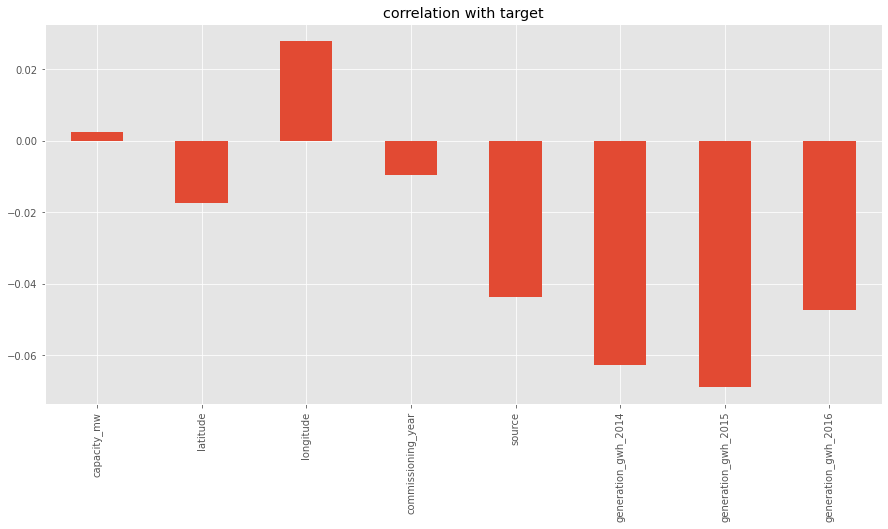

In [90]:
plt.figure(figsize=(15,7))
x.corrwith(y).plot(kind='bar',grid=True,title='correlation with target')

In [91]:
## Model Building
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [98]:
# DecisionTree
dt=DecisionTreeClassifier()

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)

In [104]:
def model(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        ypred=clf.predict(x_train)
        print('  Training Result  ')
        print('Accuracy_Score: ',accuracy_score(y_train,ypred)*100)
        
    elif train==False:
        y_pred=clf.predict(x_test)
        print('   Test Result    ')
        print('Accuracy_Score: ',accuracy_score(y_test,y_pred)*100)
        print(confusion_matrix(y_test,y_pred))
        print(classification_report(y_test,y_pred))
        

        

In [105]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [106]:
model(dt,x_train,x_test,y_train,y_test,train=True)

  Training Result  
Accuracy_Score:  100.0


In [107]:
model(dt,x_train,x_test,y_train,y_test,train=False)

   Test Result    
Accuracy_Score:  74.64788732394366
[[ 5  2  0  0  0  0  0  0]
 [ 3 42  1  5  1  0  1  0]
 [ 0  6  7  4  0  1  2  0]
 [ 0  7  3 47  0  4  0  0]
 [ 0  3  0  1  0  0  0  0]
 [ 0  0  1  2  0  2  0  0]
 [ 2  5  0  0  0  0 26  0]
 [ 0  0  0  0  0  0  0 30]]
              precision    recall  f1-score   support

           0       0.50      0.71      0.59         7
           1       0.65      0.79      0.71        53
           2       0.58      0.35      0.44        20
           3       0.80      0.77      0.78        61
           4       0.00      0.00      0.00         4
           5       0.29      0.40      0.33         5
           6       0.90      0.79      0.84        33
           7       1.00      1.00      1.00        30

    accuracy                           0.75       213
   macro avg       0.59      0.60      0.59       213
weighted avg       0.75      0.75      0.74       213



# RandomForest Classifier

In [109]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [110]:
model(rf,x_train,x_test,y_train,y_test,train=True)

  Training Result  
Accuracy_Score:  100.0


In [111]:
model(rf,x_train,x_test,y_train,y_test,train=False)

   Test Result    
Accuracy_Score:  79.34272300469483
[[ 5  2  0  0  0  0  0  0]
 [ 4 40  0  6  0  0  3  0]
 [ 0  6  8  5  0  1  0  0]
 [ 0  4  0 57  0  0  0  0]
 [ 0  3  0  1  0  0  0  0]
 [ 0  0  3  0  0  2  0  0]
 [ 1  4  0  0  0  0 28  0]
 [ 0  0  0  0  0  0  1 29]]
              precision    recall  f1-score   support

           0       0.50      0.71      0.59         7
           1       0.68      0.75      0.71        53
           2       0.73      0.40      0.52        20
           3       0.83      0.93      0.88        61
           4       0.00      0.00      0.00         4
           5       0.67      0.40      0.50         5
           6       0.88      0.85      0.86        33
           7       1.00      0.97      0.98        30

    accuracy                           0.79       213
   macro avg       0.66      0.63      0.63       213
weighted avg       0.78      0.79      0.78       213



In [112]:
gbdt=GradientBoostingClassifier()
gbdt.fit(x_train,y_train)

GradientBoostingClassifier()

In [113]:
model(gbdt,x_train,x_test,y_train,y_test,train=True)

  Training Result  
Accuracy_Score:  100.0


In [114]:
model(gbdt,x_train,x_test,y_train,y_test,train=False)

   Test Result    
Accuracy_Score:  82.15962441314554
[[ 6  1  0  0  0  0  0  0]
 [ 3 41  1  5  0  0  3  0]
 [ 0  4 10  3  0  2  1  0]
 [ 0  4  0 57  0  0  0  0]
 [ 0  2  1  1  0  0  0  0]
 [ 0  0  3  1  0  1  0  0]
 [ 1  2  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0 30]]
              precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           1       0.76      0.77      0.77        53
           2       0.67      0.50      0.57        20
           3       0.85      0.93      0.89        61
           4       0.00      0.00      0.00         4
           5       0.33      0.20      0.25         5
           6       0.88      0.91      0.90        33
           7       1.00      1.00      1.00        30

    accuracy                           0.82       213
   macro avg       0.64      0.65      0.63       213
weighted avg       0.80      0.82      0.81       213



In [115]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [117]:
print('RandomForest',cross_val_score(rf,x,y,cv=5).mean())
print('DecisionTree',cross_val_score(dt,x,y,cv=5).mean())
print('GradientBoosting',cross_val_score(gbdt,x,y,cv=5).mean())

RandomForest 0.8192844857241142
DecisionTree 0.7687925696594428
GradientBoosting 0.8215961472308221


In [118]:
## Lets check distance based algorithm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [119]:
x_scaled=scaler.fit_transform(x)

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=41)

# SVM

In [121]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [122]:
model(svc,x_train,x_test,y_train,y_test,train=True)

  Training Result  
Accuracy_Score:  77.77777777777779


In [123]:
model(svc,x_train,x_test,y_train,y_test,train=False)

   Test Result    
Accuracy_Score:  71.83098591549296
[[ 4  2  0  0  0  0  0  1]
 [ 2 40  0  5  0  0  3  3]
 [ 2  7  4  7  0  0  0  0]
 [ 0  5  0 50  0  0  0  6]
 [ 0  3  0  1  0  0  0  0]
 [ 0  0  1  4  0  0  0  0]
 [ 3  3  0  0  0  0 25  2]
 [ 0  0  0  0  0  0  0 30]]
              precision    recall  f1-score   support

           0       0.36      0.57      0.44         7
           1       0.67      0.75      0.71        53
           2       0.80      0.20      0.32        20
           3       0.75      0.82      0.78        61
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         5
           6       0.89      0.76      0.82        33
           7       0.71      1.00      0.83        30

    accuracy                           0.72       213
   macro avg       0.52      0.51      0.49       213
weighted avg       0.71      0.72      0.69       213



# KNN

In [124]:
knn=KNeighborsClassifier()

In [125]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [126]:
model(knn,x_train,x_test,y_train,y_test,train=True)

  Training Result  
Accuracy_Score:  83.8810641627543


In [127]:
model(knn,x_train,x_test,y_train,y_test,train=False)

   Test Result    
Accuracy_Score:  73.23943661971832
[[ 4  2  0  0  0  0  0  1]
 [ 4 40  2  3  0  0  1  3]
 [ 0  6  7  5  0  2  0  0]
 [ 0  4  1 48  0  1  0  7]
 [ 0  3  0  1  0  0  0  0]
 [ 0  0  1  3  0  1  0  0]
 [ 4  2  1  0  0  0 26  0]
 [ 0  0  0  0  0  0  0 30]]
              precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.70      0.75      0.73        53
           2       0.58      0.35      0.44        20
           3       0.80      0.79      0.79        61
           4       0.00      0.00      0.00         4
           5       0.25      0.20      0.22         5
           6       0.96      0.79      0.87        33
           7       0.73      1.00      0.85        30

    accuracy                           0.73       213
   macro avg       0.55      0.56      0.54       213
weighted avg       0.73      0.73      0.72       213



In [128]:
print('SVM',cross_val_score(svc,x,y,cv=5).mean())
print('KNN',cross_val_score(knn,x,y,cv=5).mean())

SVM 0.7429308565531476
KNN 0.7746336429308565


# GradientBoosting and Random Forest gives high accuracy,so lets do the hyperparameter tuning

In [129]:
params={'learning_rate':[0.1,0.01,1,0.2,0.002],
       'n_estimators':[100],
       'min_samples_split':[3,4,5,6,7,8],
       'min_samples_leaf':[1,2,3,4,5,6],
       'max_depth':[3,4,5,6,7,8,9]}

In [131]:
gv=GridSearchCV(gbdt,param_grid=params,cv=5,n_jobs=-1)

In [132]:
gv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 1, 0.2, 0.002],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6, 7, 8],
                         'n_estimators': [100]})

In [133]:
gv.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 100}

In [200]:
gbdt=GradientBoostingClassifier(learning_rate=0.1,max_depth=3,min_samples_leaf=3,min_samples_split=7,n_estimators=100)

In [201]:
gbdt.fit(x_train,y_train)

GradientBoostingClassifier(min_samples_leaf=3, min_samples_split=7)

In [202]:
model(gbdt,x_train,x_test,y_train,y_test,train=True)

  Training Result  
Accuracy_Score:  100.0


In [203]:
model(gbdt,x_train,x_test,y_train,y_test,train=False)

   Test Result    
Accuracy_Score:  82.15962441314554
[[ 6  1  0  0  0  0  0  0]
 [ 3 41  1  5  0  0  3  0]
 [ 1  5  9  4  0  0  1  0]
 [ 0  5  0 56  0  0  0  0]
 [ 0  2  0  1  1  0  0  0]
 [ 0  0  2  0  0  3  0  0]
 [ 1  3  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 30]]
              precision    recall  f1-score   support

           0       0.55      0.86      0.67         7
           1       0.72      0.77      0.75        53
           2       0.75      0.45      0.56        20
           3       0.85      0.92      0.88        61
           4       1.00      0.25      0.40         4
           5       1.00      0.60      0.75         5
           6       0.88      0.88      0.88        33
           7       1.00      1.00      1.00        30

    accuracy                           0.82       213
   macro avg       0.84      0.72      0.74       213
weighted avg       0.83      0.82      0.81       213



In [204]:
print('GradientBoosting',cross_val_score(gbdt,x,y,cv=5).mean())

GradientBoosting 0.8298245614035087


# Hyperparameter Tuning Of RandomForest

In [156]:
params={'criterion':['gini','entropy'],
       'n_estimators':[100],
       'min_samples_split':[3,4,5,6,7,8],
       'min_samples_leaf':[1,2,3,4,5,6],
       'max_depth':[3,4,5,6,7,8,9]}

In [157]:
gv=GridSearchCV(rf,param_grid=params,n_jobs=-1)
gv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6, 7, 8],
                         'n_estimators': [100]})

In [158]:
gv.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [197]:
rf=RandomForestClassifier(criterion='gini',max_depth=10,min_samples_leaf=6,min_samples_split=3,n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=6, min_samples_split=3)

In [198]:
model(rf,x_train,x_test,y_train,y_test,train=True)

  Training Result  
Accuracy_Score:  85.91549295774648


In [199]:
model(rf,x_train,x_test,y_train,y_test,train=False)

   Test Result    
Accuracy_Score:  77.46478873239437
[[ 5  2  0  0  0  0  0  0]
 [ 4 36  0  6  0  0  4  3]
 [ 1  6  8  5  0  0  0  0]
 [ 0  4  0 57  0  0  0  0]
 [ 0  3  0  1  0  0  0  0]
 [ 0  0  0  5  0  0  0  0]
 [ 2  2  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 30]]
              precision    recall  f1-score   support

           0       0.42      0.71      0.53         7
           1       0.68      0.68      0.68        53
           2       1.00      0.40      0.57        20
           3       0.77      0.93      0.84        61
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         5
           6       0.88      0.88      0.88        33
           7       0.91      1.00      0.95        30

    accuracy                           0.77       213
   macro avg       0.58      0.58      0.56       213
weighted avg       0.76      0.77      0.75       213



# Conclusion:-Gradient boosting is the final model with accuracy of 82% and the best parameter is learning_rate=0.1,max_depth=3,min_samples_leaf=3,min_samples_split=7,n_estimators=100

In [205]:
model(gbdt,x_train,x_test,y_train,y_test,train=False)

   Test Result    
Accuracy_Score:  82.15962441314554
[[ 6  1  0  0  0  0  0  0]
 [ 3 41  1  5  0  0  3  0]
 [ 1  5  9  4  0  0  1  0]
 [ 0  5  0 56  0  0  0  0]
 [ 0  2  0  1  1  0  0  0]
 [ 0  0  2  0  0  3  0  0]
 [ 1  3  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 30]]
              precision    recall  f1-score   support

           0       0.55      0.86      0.67         7
           1       0.72      0.77      0.75        53
           2       0.75      0.45      0.56        20
           3       0.85      0.92      0.88        61
           4       1.00      0.25      0.40         4
           5       1.00      0.60      0.75         5
           6       0.88      0.88      0.88        33
           7       1.00      1.00      1.00        30

    accuracy                           0.82       213
   macro avg       0.84      0.72      0.74       213
weighted avg       0.83      0.82      0.81       213



In [206]:
y_pred=gbdt.predict(x_test)

In [207]:
Report=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [208]:
Report

,Actual,Predicted
860,3,3
228,3,3
292,1,1
189,1,1
205,7,7
...,...,...
341,3,3
834,7,7
77,1,0
223,2,2


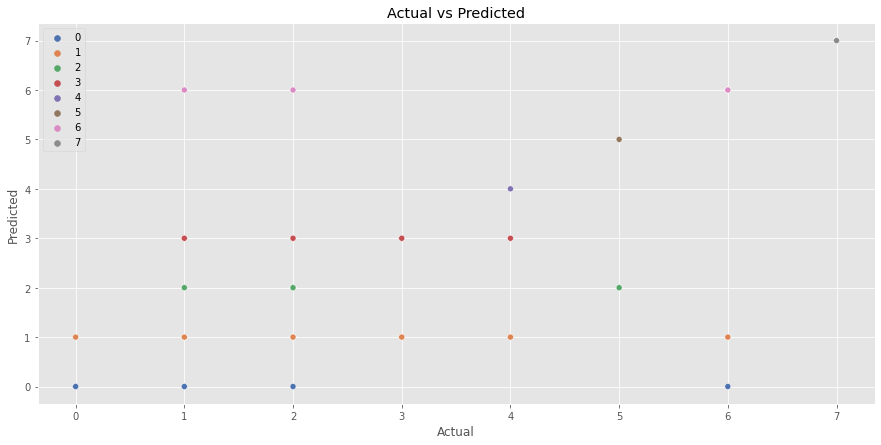

In [212]:
plt.figure(figsize=(15,7))
sns.scatterplot(y_test,y_pred,hue=y_pred,palette="deep")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Saving the model

In [213]:
import pickle
filename='PrimaryFuel'
pickle.dump(gbdt,open(filename,'wb'))

# Regression

In [214]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,109,1,1288.670952,1342.448818,1186.373783,1064.675602,925.269267
1,98.0,24.7663,74.6090,1,2001.0,174,2,1431.720928,1492.108378,1372.923956,1285.774710,1182.793896
2,39.2,21.9038,69.3732,7,2001.0,21,2,1343.644084,1399.961968,1258.063745,1149.642484,1024.234229
3,135.0,23.8712,91.3602,2,2004.0,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.0,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,22,2,446.714974,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,2001.0,77,0,1289.419905,1343.232375,1187.350486,1065.833189,926.617563
904,25.5,15.2758,75.5811,7,2001.0,21,2,1323.122778,1378.492481,1231.302097,1117.924602,987.290905
905,80.0,24.3500,73.7477,1,2001.0,59,2,1404.758629,1463.900294,1337.762667,1244.101580,1134.255222


# Target Variable-capacity_mw

In [215]:
# Separting target variable and Features
X=df.drop('capacity_mw',axis=1)
y=df.capacity_mw

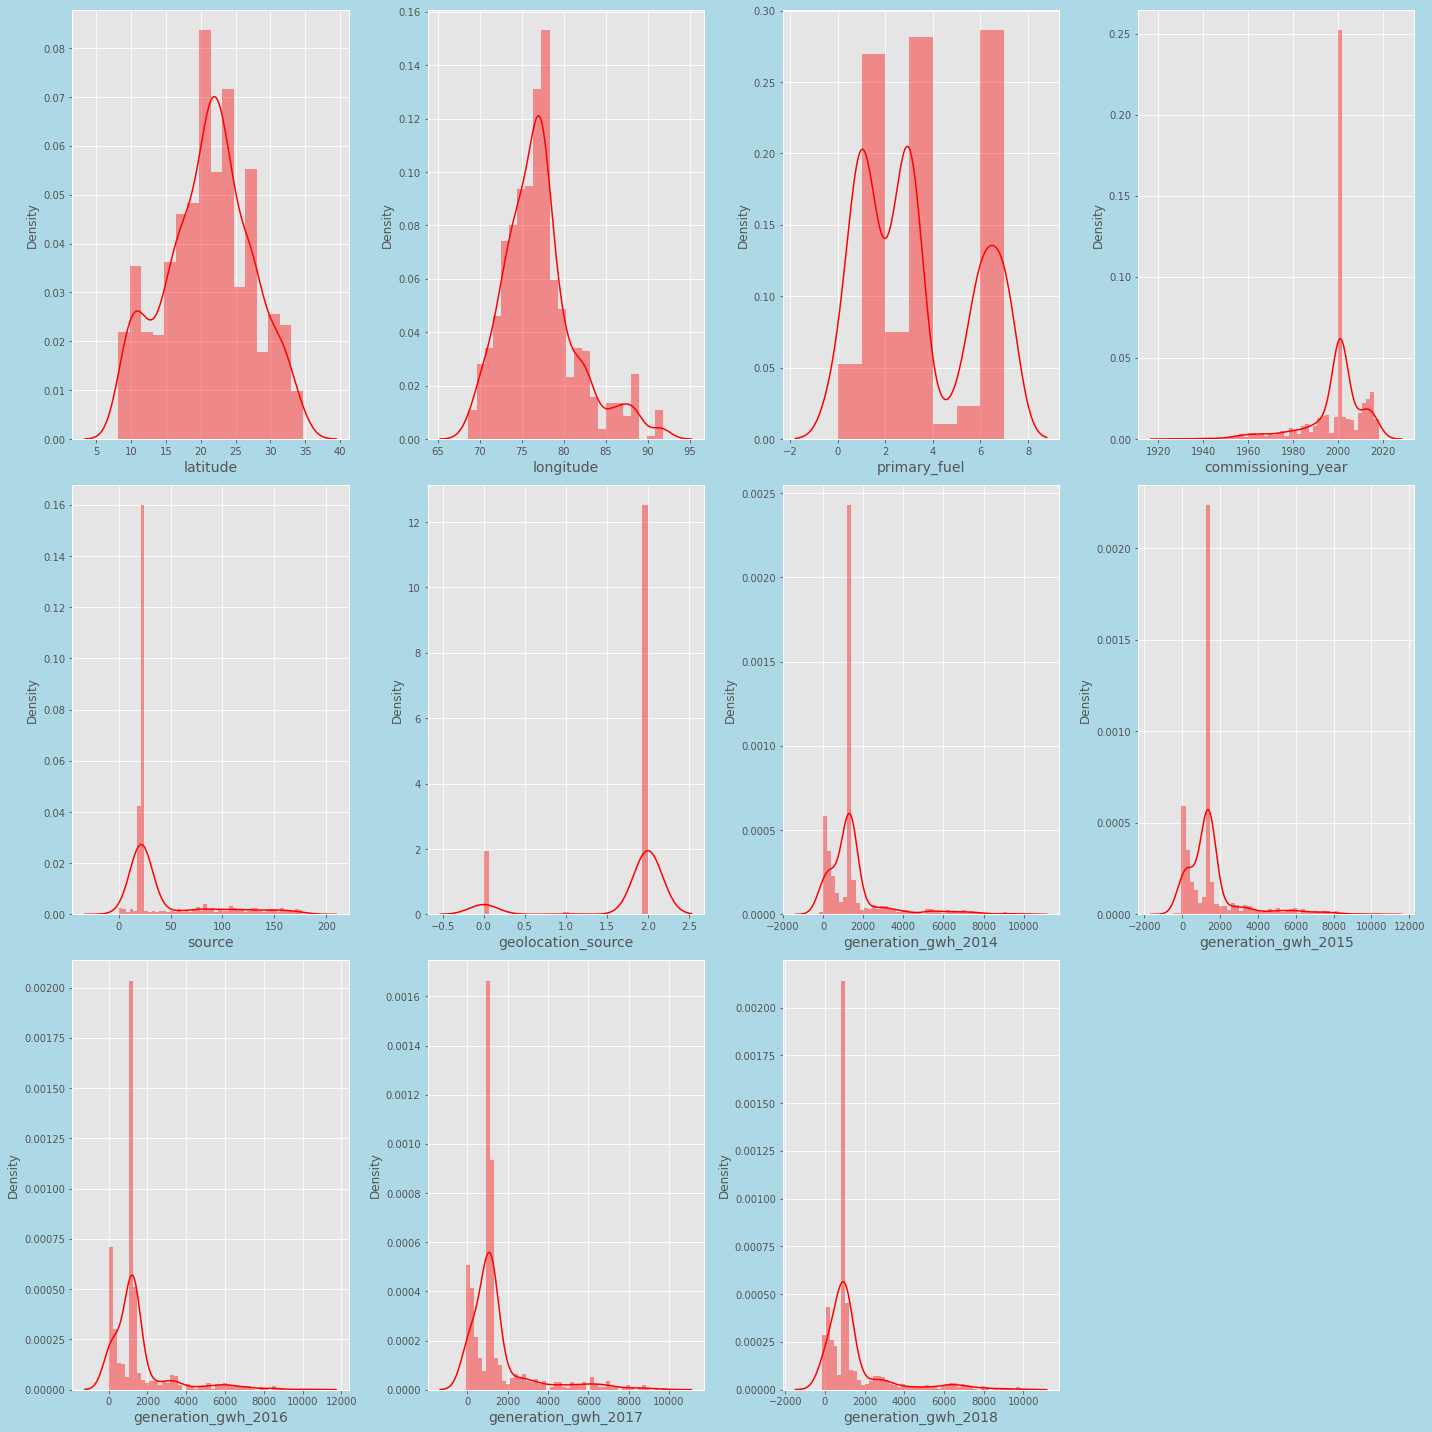

In [216]:
plt.figure(figsize=(20,20),facecolor='lightblue')
plotnumber=1

for column in X:
    if plotnumber <= 12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(X[column],color='r')
        plt.xlabel(column,fontsize=14)
    plotnumber=plotnumber+1
    
plt.tight_layout()

In [217]:
X.skew()

latitude              -0.109981
longitude              0.925439
primary_fuel           0.423184
commissioning_year    -1.718919
source                 1.818830
geolocation_source    -2.140211
generation_gwh_2014    2.661899
generation_gwh_2015    2.470095
generation_gwh_2016    2.543754
generation_gwh_2017    2.489654
generation_gwh_2018    2.570453
dtype: float64

In [218]:
# Reducing skewness through PowerTransformer
x=pd.DataFrame(pt.fit_transform(X),columns=X.columns)

In [219]:
x

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.153338,-0.941274,1.141581,1.119749,1.634724,-2.322383,0.005301,-0.016965,0.101110,-0.074703,-0.180197
1,0.590793,-0.523612,-1.034790,0.067138,2.109191,0.398946,0.112285,0.088210,0.240883,0.092945,0.013004
2,0.122919,-2.370549,1.421041,0.067138,-0.462731,0.398946,0.046838,0.023773,0.156404,-0.008597,-0.103890
3,0.444148,2.432670,-0.410833,0.358029,-0.393796,0.398946,-0.561142,-0.391123,-0.157697,-0.424922,-0.431431
4,0.132122,1.239137,-1.034790,1.612920,-0.393796,0.398946,1.146936,2.602564,2.203378,2.140869,2.922697
...,...,...,...,...,...,...,...,...,...,...,...
847,-0.783616,0.204297,-1.034790,1.743400,-0.393796,0.398946,-0.733574,-1.270353,-1.053556,-0.239672,-0.377792
848,-1.325424,0.393871,1.141581,0.067138,1.249376,-2.512703,0.005871,-0.016407,0.101878,-0.073787,-0.179138
849,-0.946644,-0.250257,1.421041,0.067138,-0.462731,0.398946,0.031397,0.008614,0.136008,-0.033012,-0.132048
850,0.522553,-0.781799,-1.034790,0.067138,0.934129,0.398946,0.092389,0.068589,0.215526,0.062392,-0.022139


In [220]:
x.skew()

latitude              -0.073608
longitude             -0.002018
primary_fuel          -0.057182
commissioning_year    -0.547000
source                -0.192768
geolocation_source    -2.111830
generation_gwh_2014    0.755796
generation_gwh_2015    0.807803
generation_gwh_2016    0.026304
generation_gwh_2017    0.400120
generation_gwh_2018    0.573718
dtype: float64

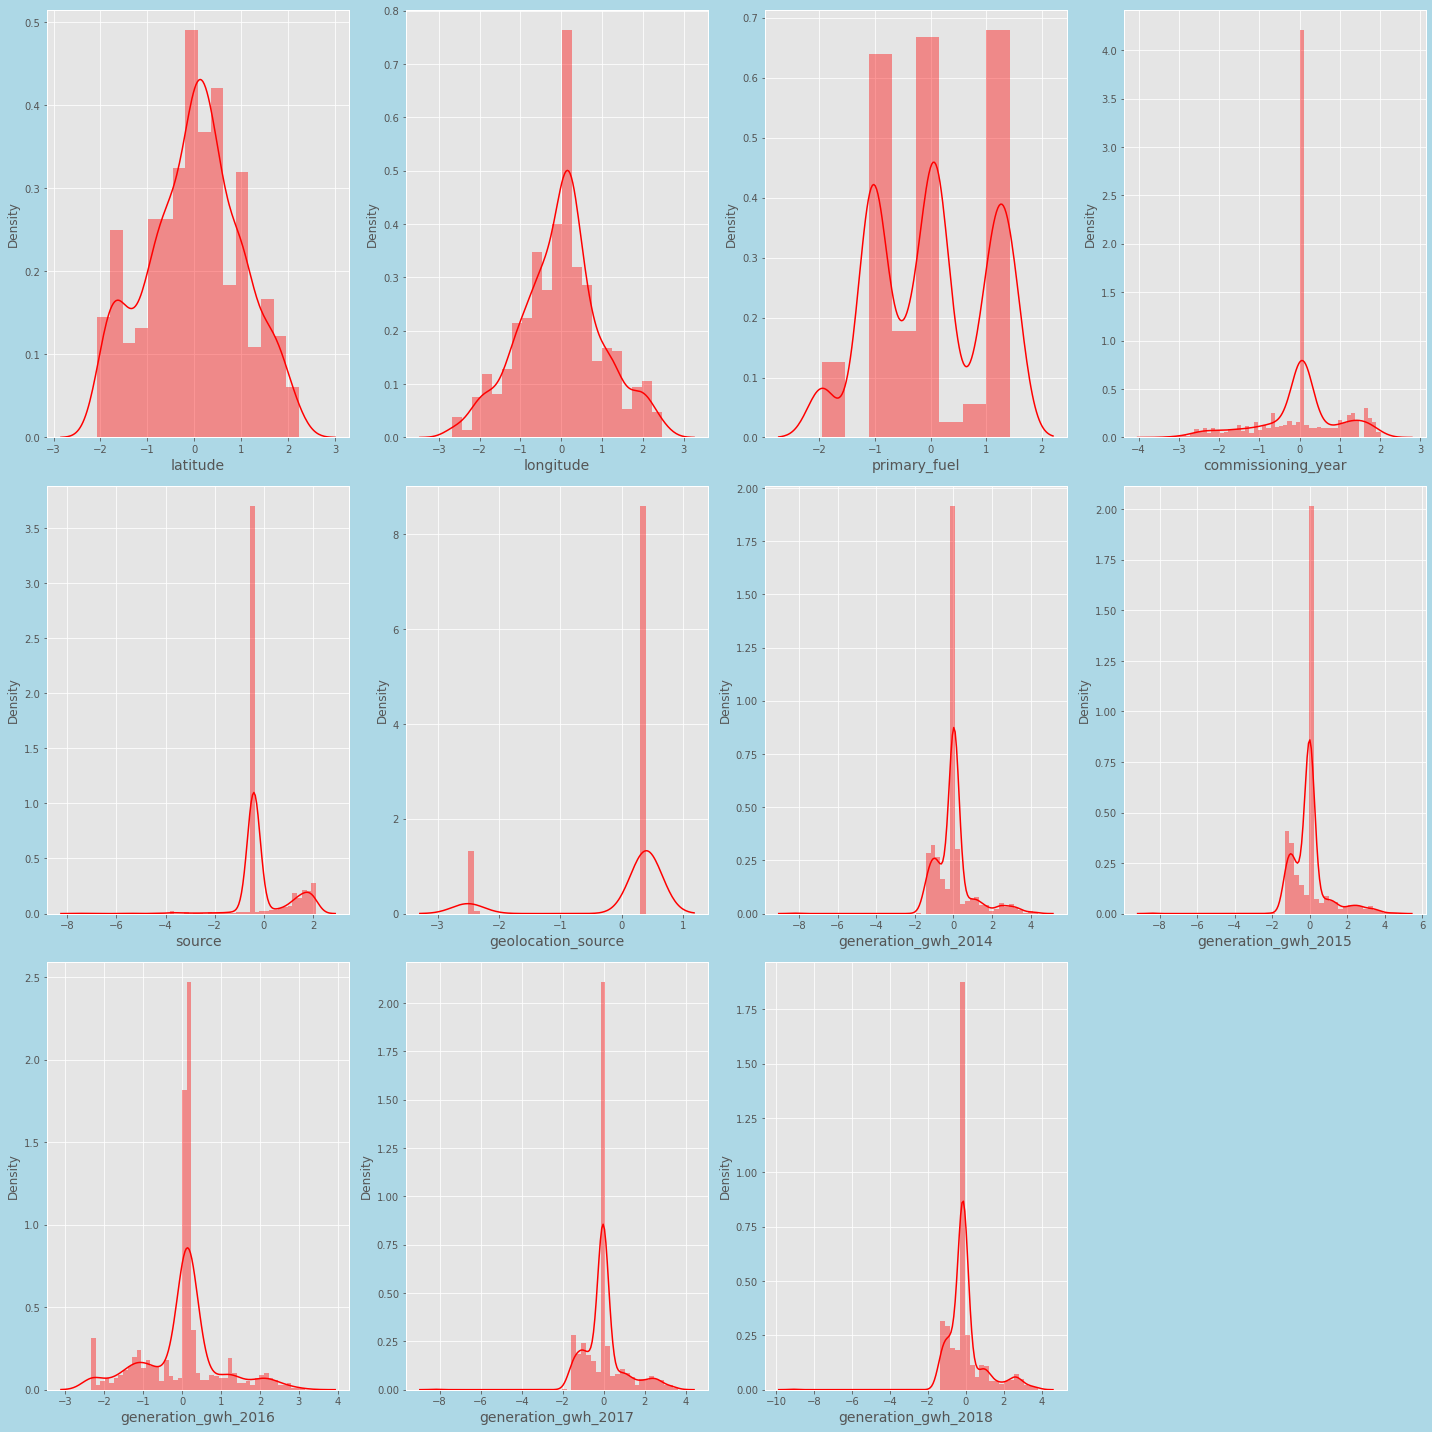

In [222]:
plt.figure(figsize=(20,20),facecolor='lightblue')
plotnumber=1

for column in x:
    if plotnumber <= 12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(x[column],color='r')
        plt.xlabel(column,fontsize=14)
    plotnumber=plotnumber+1
    
plt.tight_layout()

# Observation:- Based on skewness dropping geolocation_source column

In [223]:
x.drop('geolocation_source',axis=1,inplace=True)

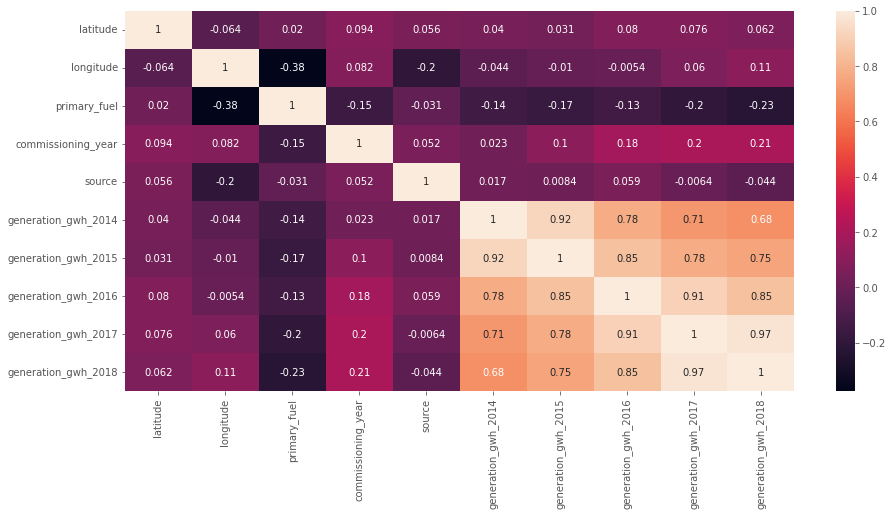

In [225]:
plt.figure(figsize=(15,7))
sns.heatmap(x.corr(),annot=True,annot_kws={'size':10})
plt.show()

In [226]:
x_scaled=scaler.fit_transform(x)

In [227]:
x_scaled.shape[1]

10

In [228]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.025595,latitude
1,1.271081,longitude
2,1.266931,primary_fuel
3,1.123128,commissioning_year
4,1.099347,source
5,6.884931,generation_gwh_2014
6,9.584244,generation_gwh_2015
7,9.259389,generation_gwh_2016
8,28.843980,generation_gwh_2017
9,19.153470,generation_gwh_2018


## Observation:- Since multicollinearity exist in two columns which is >10,so dropping these two columns..

In [229]:
x.drop(columns=['generation_gwh_2017','generation_gwh_2018'],axis=1,inplace=True)

In [230]:
# Model building
x_scaled=scaler.fit_transform(x)

In [231]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=41)

In [233]:
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [234]:
def model(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        ypred=clf.predict(x_train)
        print('Traning r2_score: ',r2_score(y_train,ypred)*100)
    elif train==False:
        y_pred=clf.predict(x_test)
        print('The testing Score-',r2_score(y_test,y_pred)*100)
        print('MSE: ',mean_squared_error(y_test,y_pred))
        print('MAE: ',mean_absolute_error(y_test,y_pred))
        print('RMSE ',np.sqrt(mean_squared_error(y_test,y_pred)))




# LinearRegression

In [236]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [237]:
model(lr,x_train,x_test,y_train,y_test,train=True)

Traning r2_score:  51.73025175076976


In [238]:
model(lr,x_train,x_test,y_train,y_test,train=False)

The testing Score- 43.28312380488456
MSE:  98834.49153943674
MAE:  222.47193984077754
RMSE  314.3795342248549


In [241]:
# Regularization
## Ridge Regression through through cross_validation
ridgecv=RidgeCV(alphas=(0.1,1,10,0.01,0.002),cv=10,normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([1.e-01, 1.e+00, 1.e+01, 1.e-02, 2.e-03]), cv=10,
        normalize=True)

In [244]:
ridgecv.alpha_

0.1

In [245]:
ridge=Ridge(alpha=0.1)
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [246]:
model(ridge,x_train,x_test,y_train,y_test,train=True)

Traning r2_score:  51.730250997272506


In [247]:
model(ridge,x_train,x_test,y_train,y_test,train=False)

The testing Score- 43.28352749482196
MSE:  98833.78807174988
MAE:  222.4663068182616
RMSE  314.3784154037136


In [248]:
## LASSO Regression
lassocv=LassoCV(cv=10,max_iter=10000,normalize=True)
lassocv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [249]:
lassocv.alpha_

0.11458056798943707

In [250]:
lasso=Lasso(alpha=lassocv.alpha_)
lasso.fit(x_train,y_train)

Lasso(alpha=0.11458056798943707)

In [251]:
model(lasso,x_train,x_test,y_train,y_test,train=True)

Traning r2_score:  51.730216051372715


In [252]:
model(lasso,x_train,x_test,y_train,y_test,train=False)

The testing Score- 43.28612601476368
MSE:  98829.25990633556
MAE:  222.45631094102433
RMSE  314.37121354592176


# Random Forest

In [253]:
rd=RandomForestRegressor()
rd.fit(x_train,y_train)

RandomForestRegressor()

In [254]:
model(rd,x_train,x_test,y_train,y_test,train=True)

Traning r2_score:  97.40477349458787


In [255]:
model(rd,x_train,x_test,y_train,y_test,train=False)

The testing Score- 79.92714916725839
MSE:  34978.83062134922
MAE:  87.98542478873239
RMSE  187.0262832367398


# SVM

In [256]:
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [257]:
model(svr,x_train,x_test,y_train,y_test,train=True)

Traning r2_score:  -15.77086572640598


In [258]:
model(svr,x_train,x_test,y_train,y_test,train=False)

The testing Score- -16.890328791910434
MSE:  203692.392583162
MAE:  232.1052317315892
RMSE  451.3229360260367


# xgboost

In [259]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [260]:
model(xgb,x_train,x_test,y_train,y_test,train=True)

Traning r2_score:  99.99835632106222


In [261]:
model(xgb,x_train,x_test,y_train,y_test,train=False)

The testing Score- 79.93377700703947
MSE:  34967.28098711842
MAE:  90.49394295144137
RMSE  186.99540365238505


# KNN

In [262]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [263]:
model(knn,x_train,x_test,y_train,y_test,train=True)

Traning r2_score:  83.7506701843496


In [264]:
model(knn,x_train,x_test,y_train,y_test,train=False)

The testing Score- 60.15099002387176
MSE:  69440.64806728132
MAE:  128.19712394366198
RMSE  263.51593512970203


In [265]:
# Hyperparameter Tunning
params={'n_estimators':[100],
       'criterion':['squared_error'],
       'max_depth':[1,2,3,4,5,6,7,8,9],
       'min_samples_split':[1,2,3,4,5,6,7,8],
       'min_samples_leaf':[3,4,5,7,8]}

In [266]:
gv=GridSearchCV(rd,param_grid=params,n_jobs=-1)
gv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [3, 4, 5, 7, 8],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [100]})

In [268]:
gv.best_params_

{'criterion': 'squared_error',
 'max_depth': 6,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 100}

In [305]:
rd=RandomForestRegressor(criterion='squared_error',max_depth=9,min_samples_leaf=3,min_samples_split=8,n_estimators=100)

In [306]:
rd.fit(x_train,y_train)

RandomForestRegressor(max_depth=9, min_samples_leaf=3, min_samples_split=8)

In [307]:
model(rd,x_train,x_test,y_train,y_test,train=True)

Traning r2_score:  92.53110698134657


In [308]:
model(rd,x_train,x_test,y_train,y_test,train=False)

The testing Score- 79.06368819654766
MSE:  36483.492579648184
MAE:  94.08176225086206
RMSE  191.00652496615967


In [309]:
print(cross_val_score(rd,x_scaled,y,cv=5).mean())

0.8108176103849327


# Final Conclusion:- Random Forest give good accuracy and cross_val_ score

In [310]:
y_pred=rd.predict(x_test)

In [311]:
Report=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [312]:
Report

,Actual,Predicted
860,3.75,31.629128
228,250.00,139.672920
292,155.00,204.467554
189,1000.00,1083.099916
205,11.20,10.953600
...,...,...
341,72.00,87.536381
834,200.00,432.555629
77,41.00,42.316041
223,468.57,270.738142


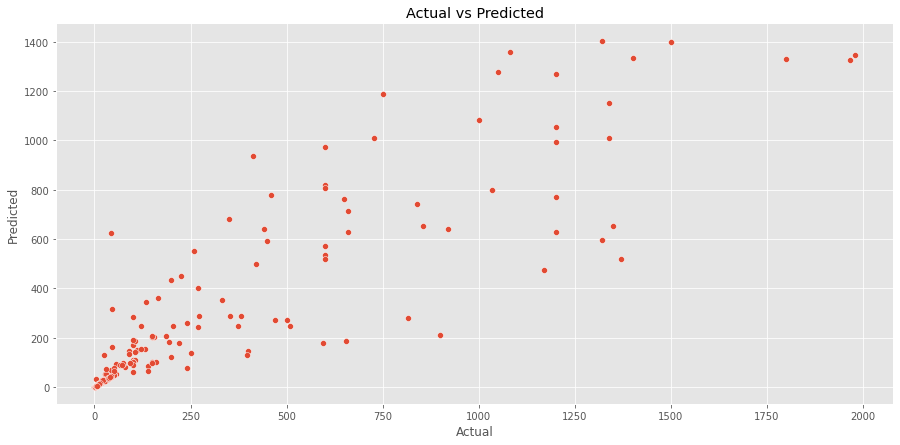

In [314]:
plt.figure(figsize=(15,7))
sns.scatterplot(y_test,y_pred,palette="deep")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Saving The Model

In [315]:
filename='GlobalPowerPlant'
pickle.dump(rd,open(filename,'wb'))